<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Domain_Analytics_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1_TtD7ufSrwyYtfOERQUyVXkUQSa9K4Uj

Downloading...
From: https://drive.google.com/uc?id=1_TtD7ufSrwyYtfOERQUyVXkUQSa9K4Uj
To: /content/shopping.csv
100% 1.07M/1.07M [00:00<00:00, 53.8MB/s]


Shopping dataset
Column Descriptions:
* Administrative: This is the number of pages of this type (administrative) that the user visited. Eg: account, addresses, cart, orders etc
* Administrative_Duration: This is the amount of time spent in this category of pages.
* Informational: This is the number of pages of this type (informational) that the user visited.
* Informational_Duration: This is the amount of time spent in this category of pages.
* ProductRelated: This is the number of pages of this type (product related) that the user visited.
* ProductRelated_Duration: This is the amount of time spent in this category of pages.
* BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
* ExitRates: The percentage of pageviews on the website that end at that specific page.
* PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated
* SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
* Month: Contains the month the pageview occurred, in string form.
* OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
* Browser: An integer value representing the browser that the user was using to view the page.
* Region: An integer value representing which region the user is located in.
* TrafficType: An integer value representing what type of traffic the user is categorized into.
* VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
* Weekend: A boolean representing whether the session is on a weekend.
* Revenue: A boolean representing whether or not the user completed the purchase

Futher Desciption of Columns for Understanding:

The 'Revenue' attribute can be used as the class label. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


In [ ]:
!gdown 1E-llv0qvRujhRIng_A46-yHTJErHBb2R

Downloading...
From: https://drive.google.com/uc?id=1E-llv0qvRujhRIng_A46-yHTJErHBb2R
To: /content/campaign - campaign.csv
100% 220k/220k [00:00<00:00, 64.0MB/s]


Campaign Dataset Column Details:
*	ID: Customer's Unique Identifier
*	Year_Birth: Customer's Birth Year
*	Education: Customer's education level (Graduation, Master, PhD, 2n Cycle(Diploma), Basic)
*	Marital_Status: Customer's marital status
*	Income: Customer's yearly household income
*	Kidhome: Number of children in customer's household
*	Teenhome: Number of teenagers in customer's household
*	Dt_Customer: Date of customer's enrollment with the company
*	Recency: Number of days since customer's last purchase
*	MntWines: Amount spent on wine in the last 2 years
*	MntFruits: Amount spent on fruits in the last 2 years
*	MntMeatProducts: Amount spent on meat in the last 2 years
*	MntFishProducts: Amount spent on fish in the last 2 years
*	MntSweetProducts: Amount spent on sweets in the last 2 years
*	MntGoldProds: Amount spent on gold in the last 2 years
*	NumDealsPurchases: Number of purchases made with a discount
*	NumWebPurchases: Number of purchases made through the company's web site
*	NumCatalogPurchases: Number of purchases made using a catalogue
*	NumStorePurchases: Number of purchases made directly in stores
*	NumWebVisitsMonth: Number of visits to company's web site in the last month
*	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
*	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
*	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
*	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
*	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
*	Complain: 1 if customer complained in the last 2 years, 0 otherwise
*	Country: Customer's location


In [3]:
shopping = pd.read_csv("shopping.csv")

In [ ]:
campaign = pd.read_csv("campaign - campaign.csv")

In [ ]:
shopping.shape

(12330, 18)

In [4]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [32]:
shopping.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [5]:
shopping.head(5)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [6]:
for x in shopping.columns:
  #print("Values count of feature ",x)
  print(shopping[x].value_counts())
  print("***********************************")

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64
***********************************
Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: count, Length: 3335, dtype: int64
***********************************
Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: count, dtype: int64
***********************************
Informational_Duration
0.00      9925
9.00        33
7

* let Convert Weekend and Revenue to Numerical from Bool

In [85]:
shopping["Weekend"]=np.where(shopping["Weekend"] == False, 0, 1)
shopping["Revenue"]=np.where(shopping["Revenue"] == False, 0, 1)

In [86]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Univariate Analysis

In [8]:
shopping.Administrative.describe()

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

<Axes: xlabel='Administrative', ylabel='count'>

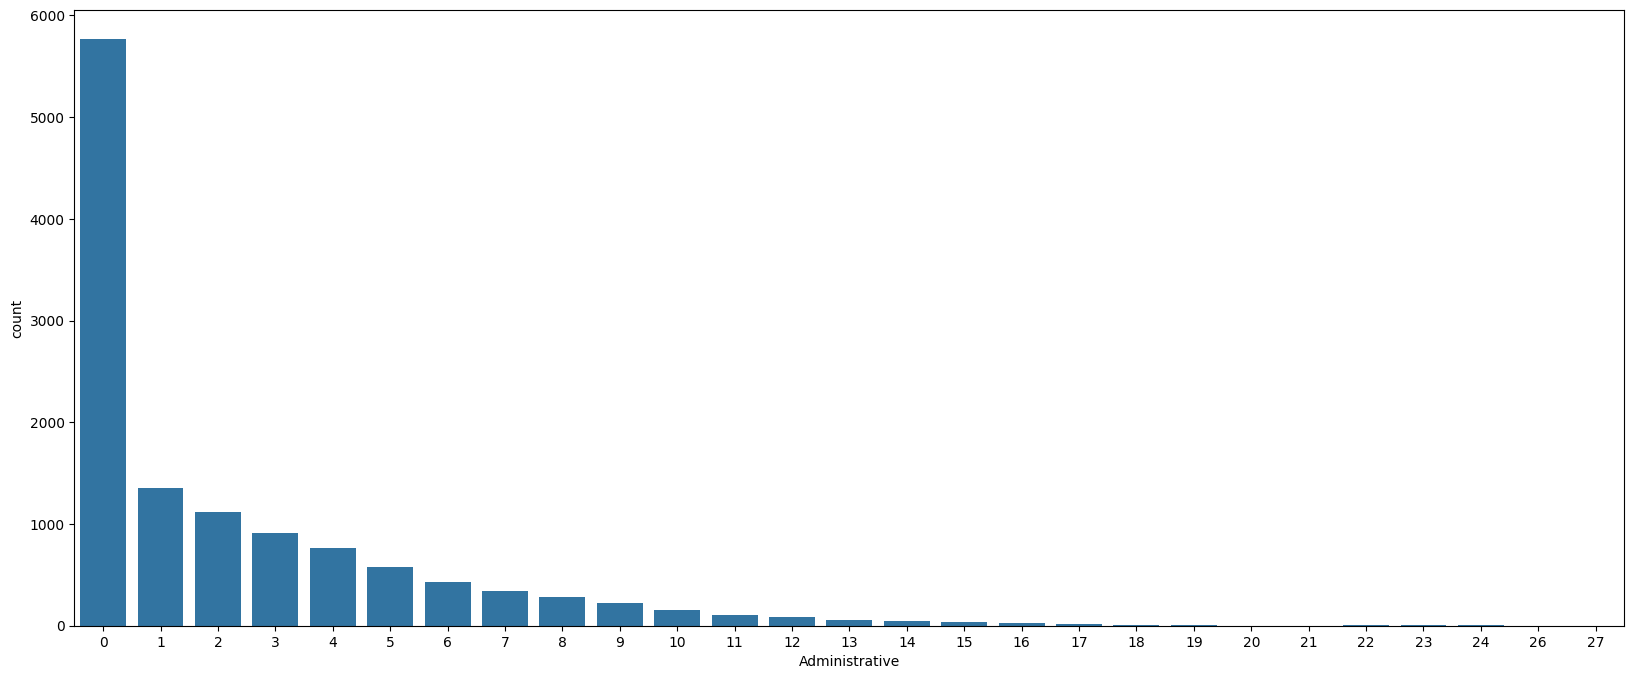

In [13]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Administrative")

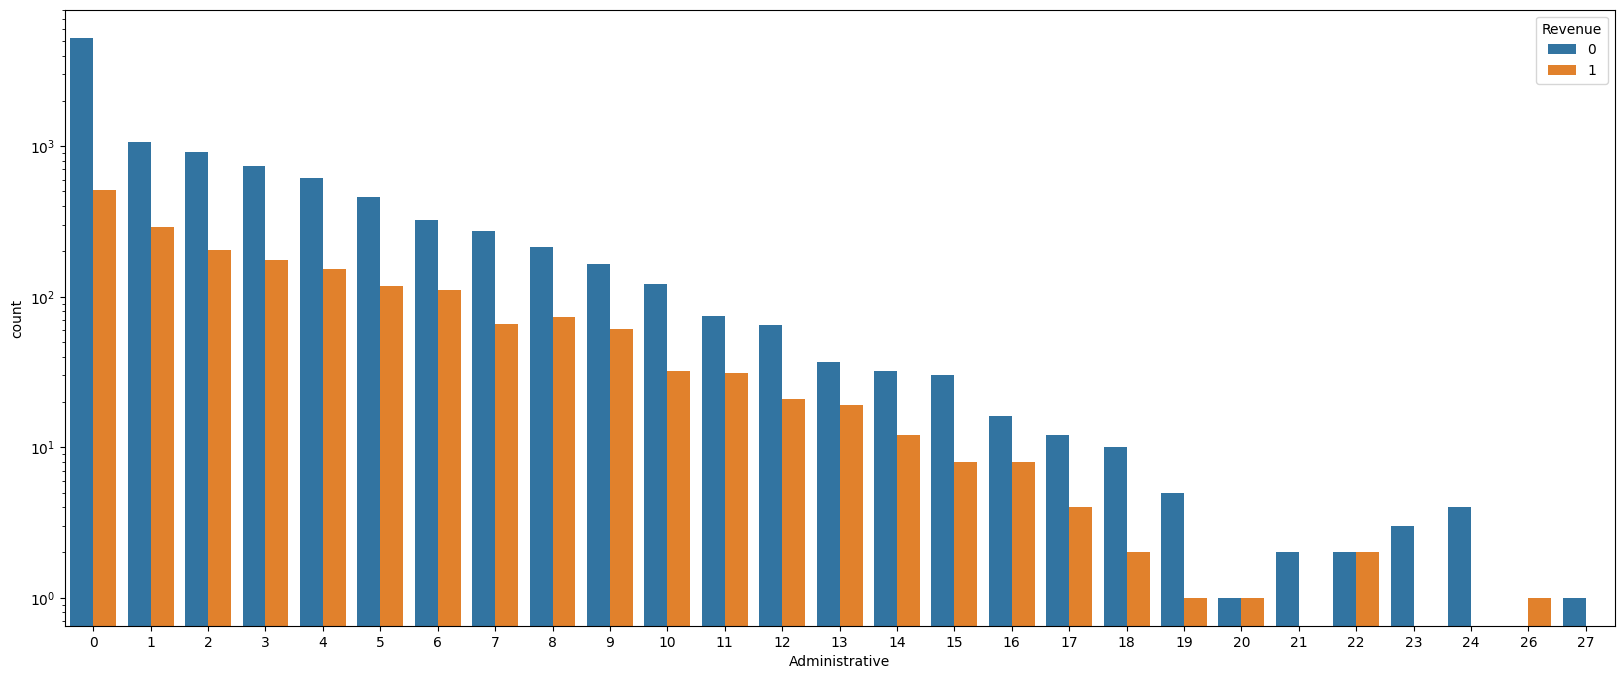

In [87]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Administrative", hue = "Revenue")
plt.yscale("log")

<Axes: ylabel='Administrative_Duration'>

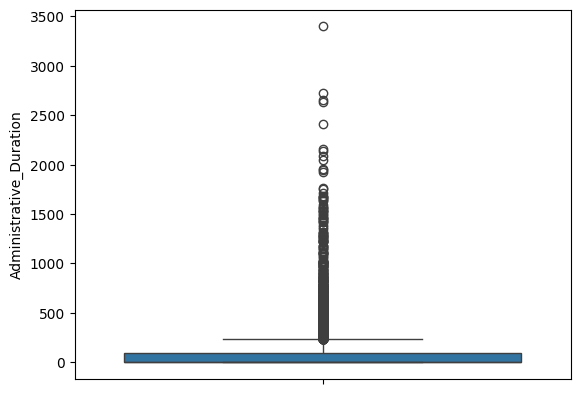

In [34]:
sns.boxplot(shopping["Administrative_Duration"])

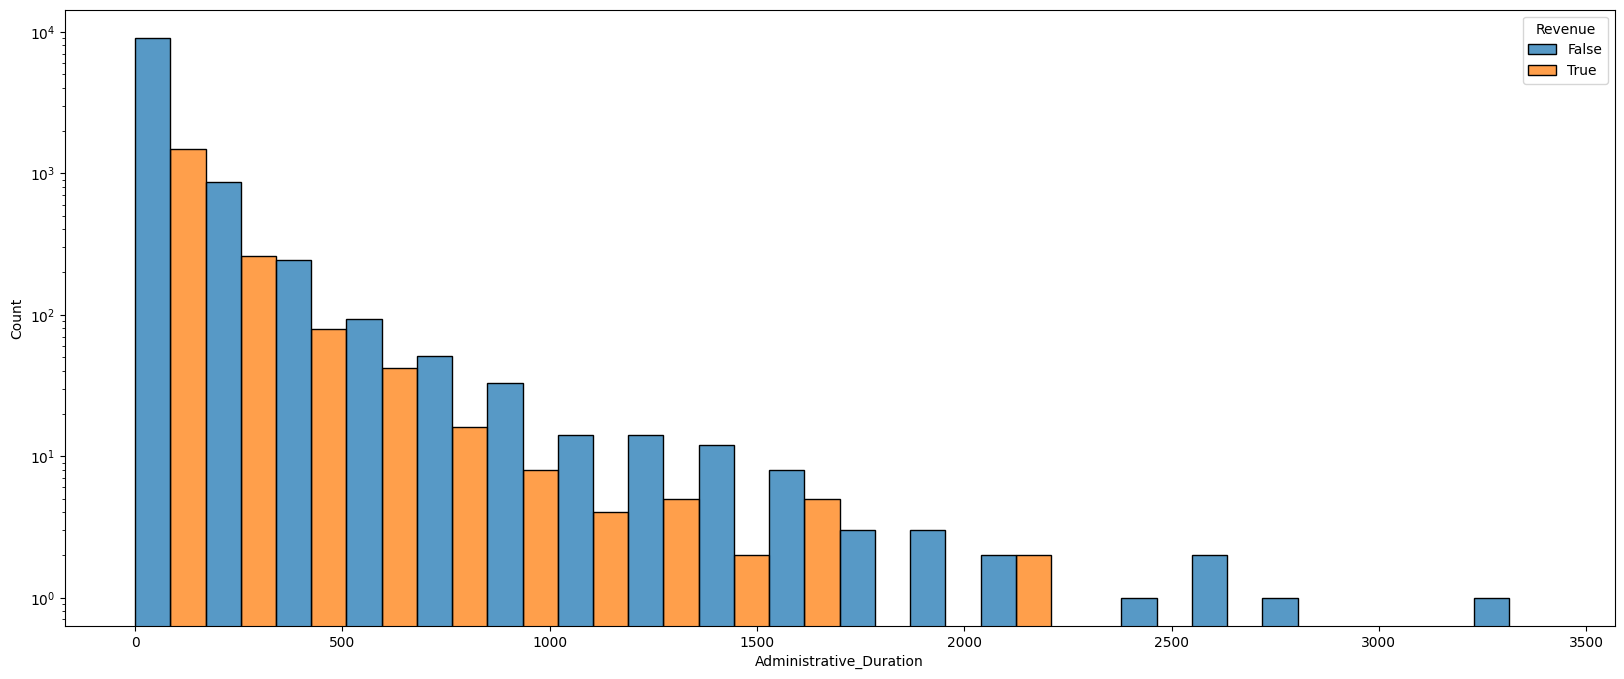

In [20]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "Administrative_Duration", hue = "Revenue", bins =20, multiple = "dodge",common_norm=True)
plt.yscale("log")

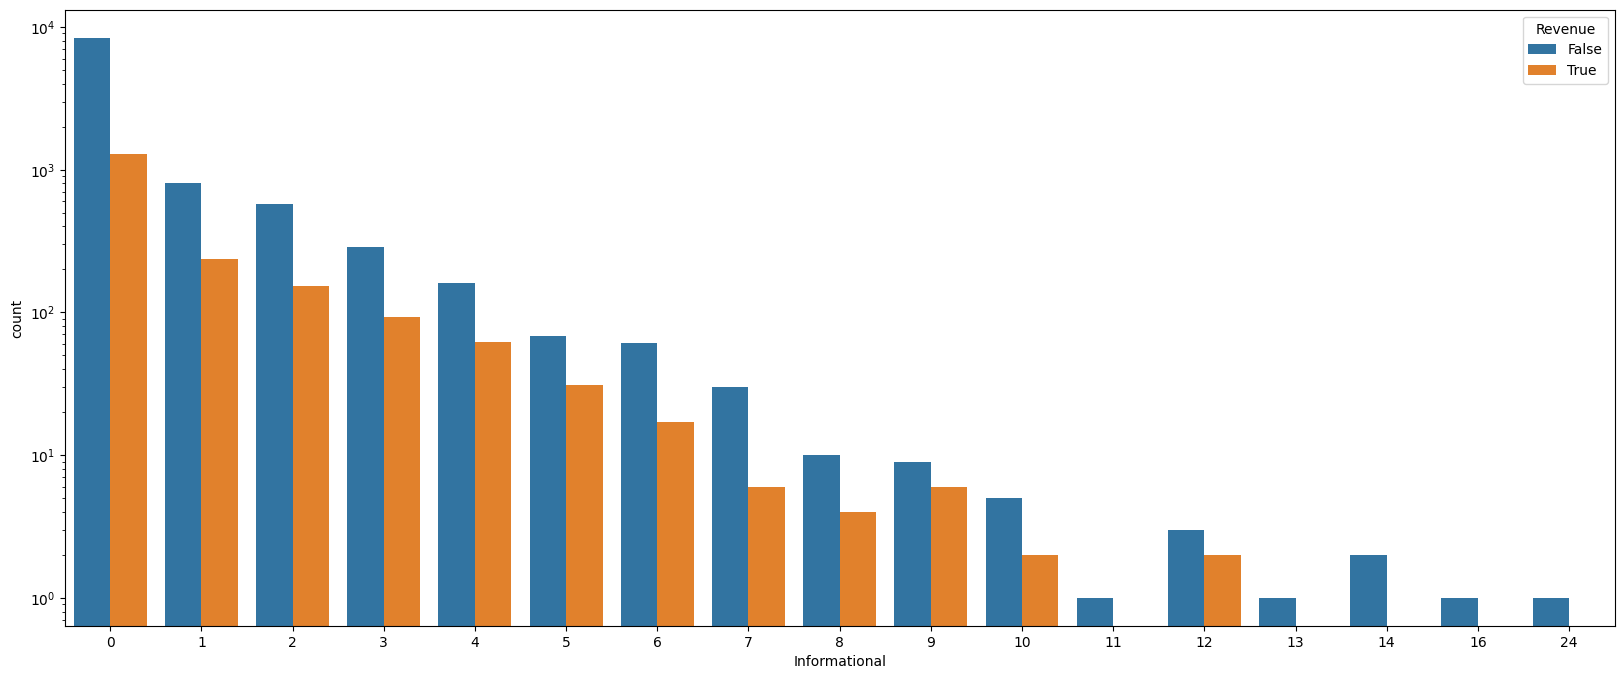

In [22]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Informational", hue = "Revenue")
plt.yscale("log")

<Axes: xlabel='Informational_Duration'>

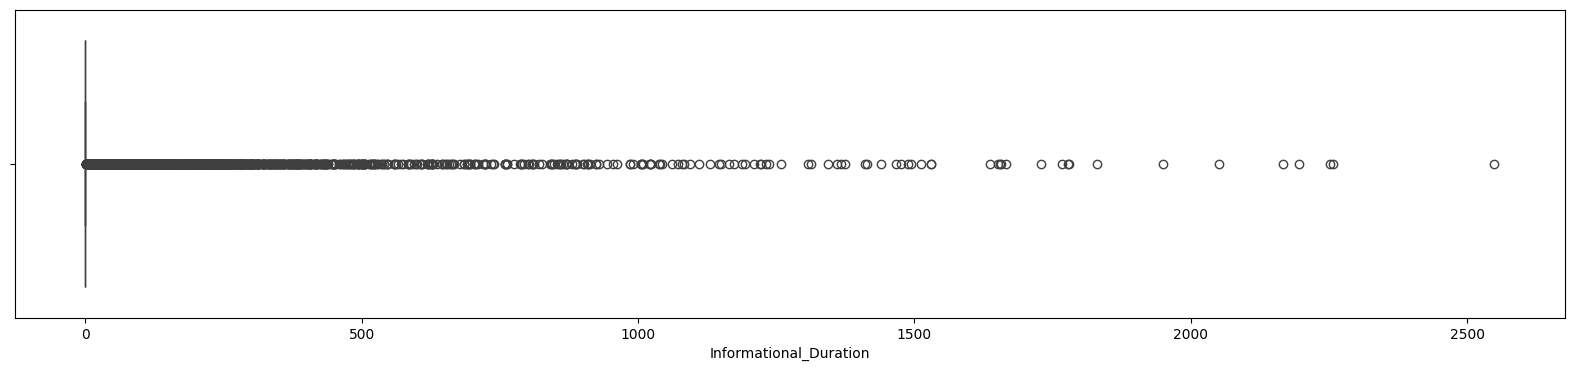

In [37]:
plt.figure(figsize =(20,4))
sns.boxplot(x=shopping["Informational_Duration"])

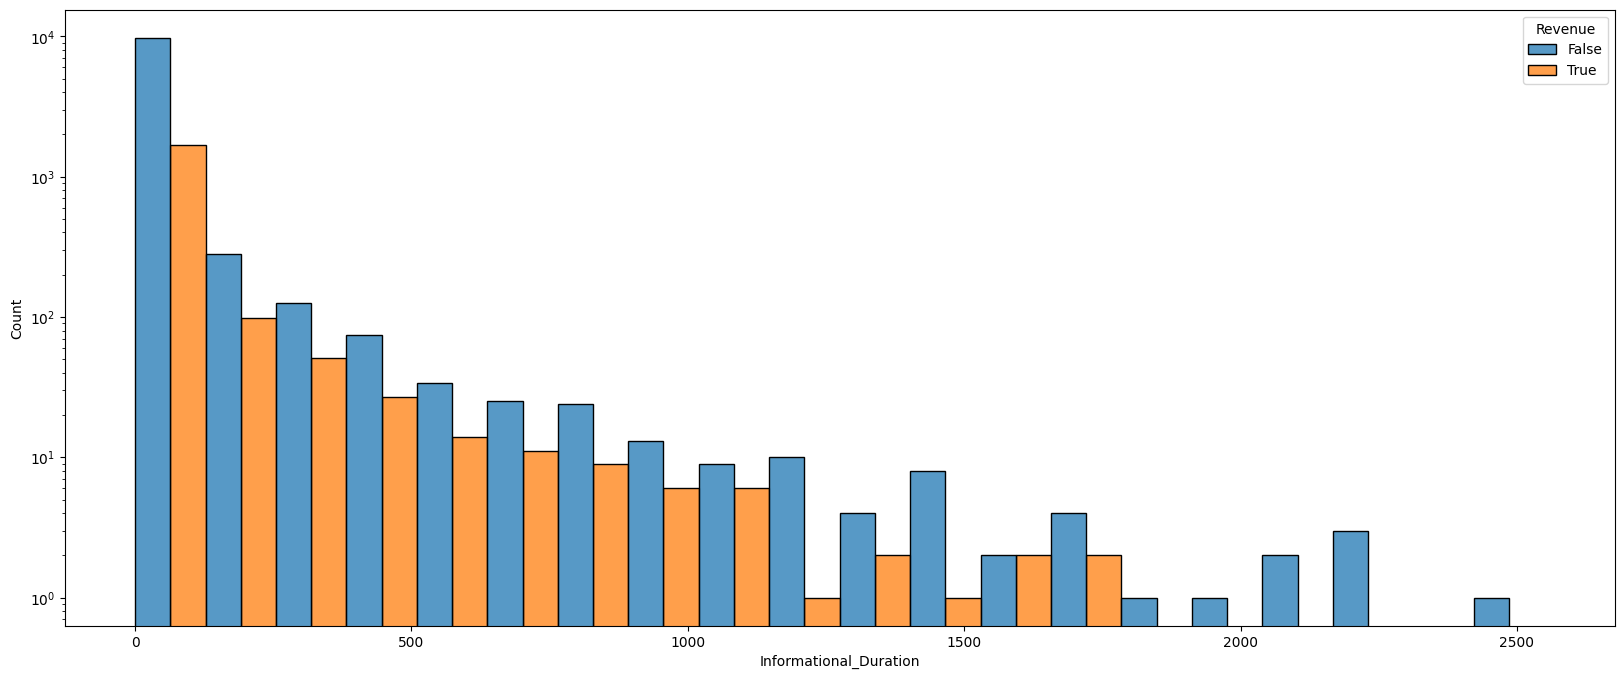

In [21]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "Informational_Duration", hue = "Revenue", bins =20, multiple = "dodge",common_norm=True)
plt.yscale("log")

In [24]:
shopping["ProductRelated"].describe()

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

<Axes: xlabel='ProductRelated'>

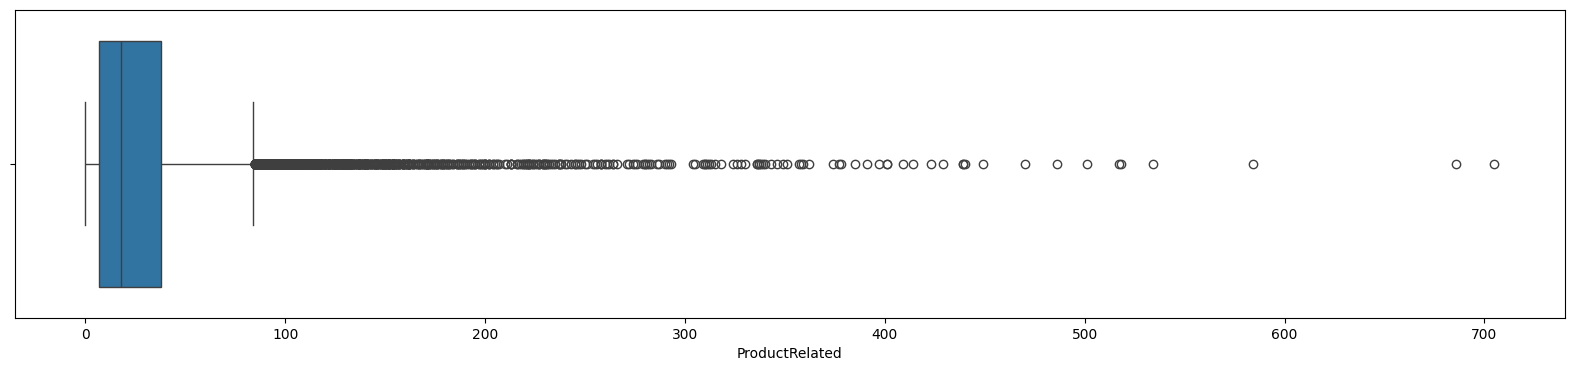

In [38]:
plt.figure(figsize =(20,4))
sns.boxplot(x=shopping["ProductRelated"])

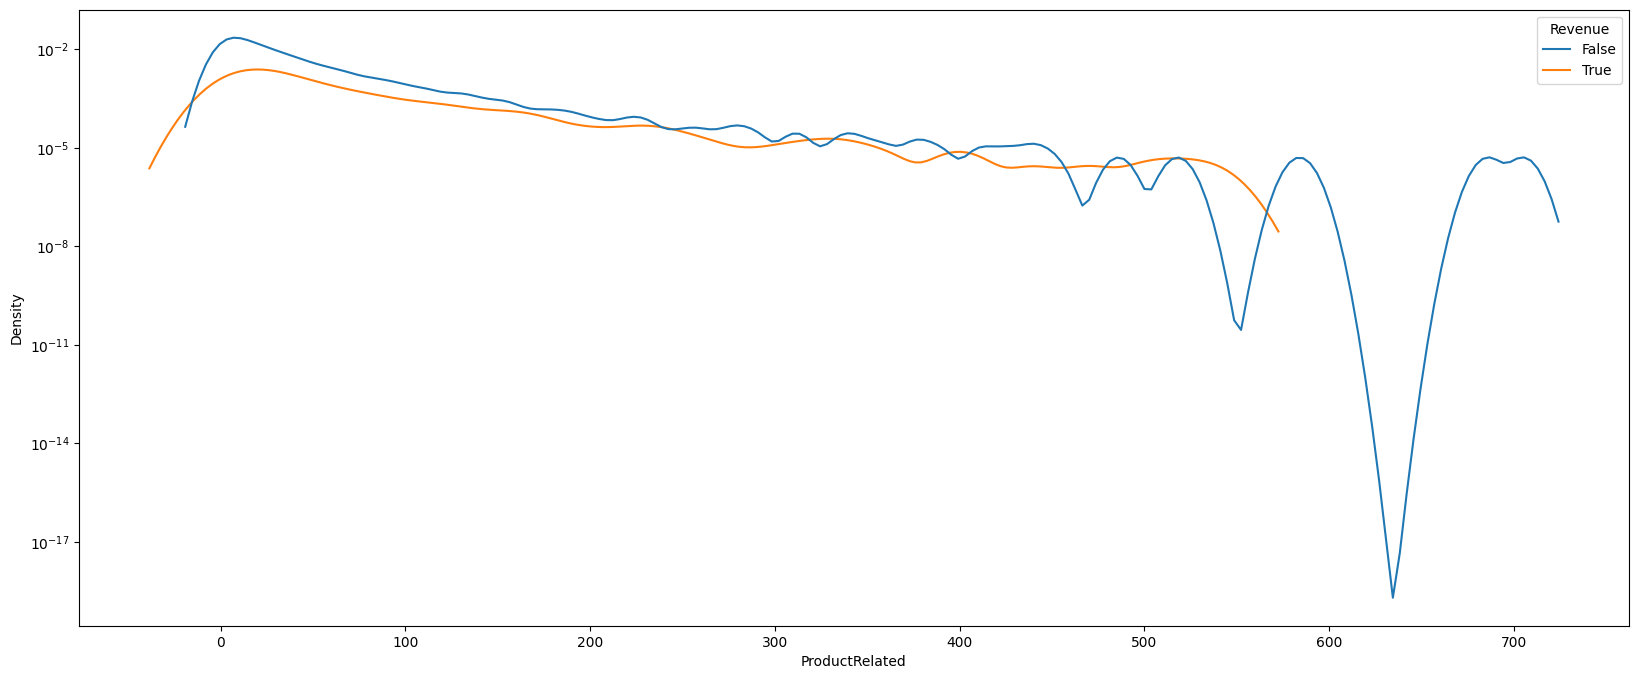

In [28]:
plt.figure(figsize =(20,8))
sns.kdeplot(data=shopping, x = "ProductRelated", hue = "Revenue")
plt.yscale("log")

<Axes: xlabel='ProductRelated_Duration'>

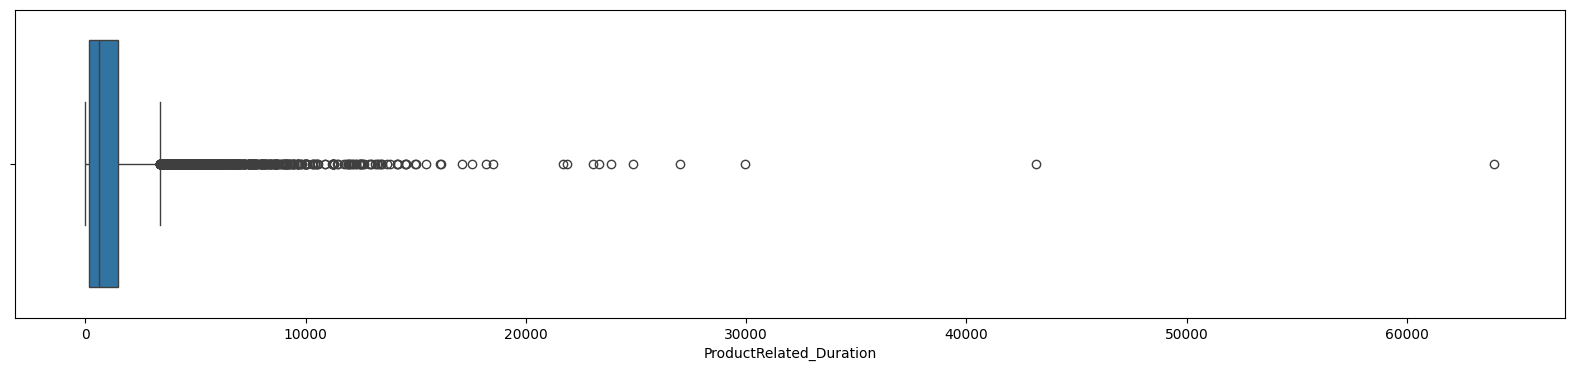

In [39]:
plt.figure(figsize =(20,4))
sns.boxplot(x= shopping["ProductRelated_Duration"])

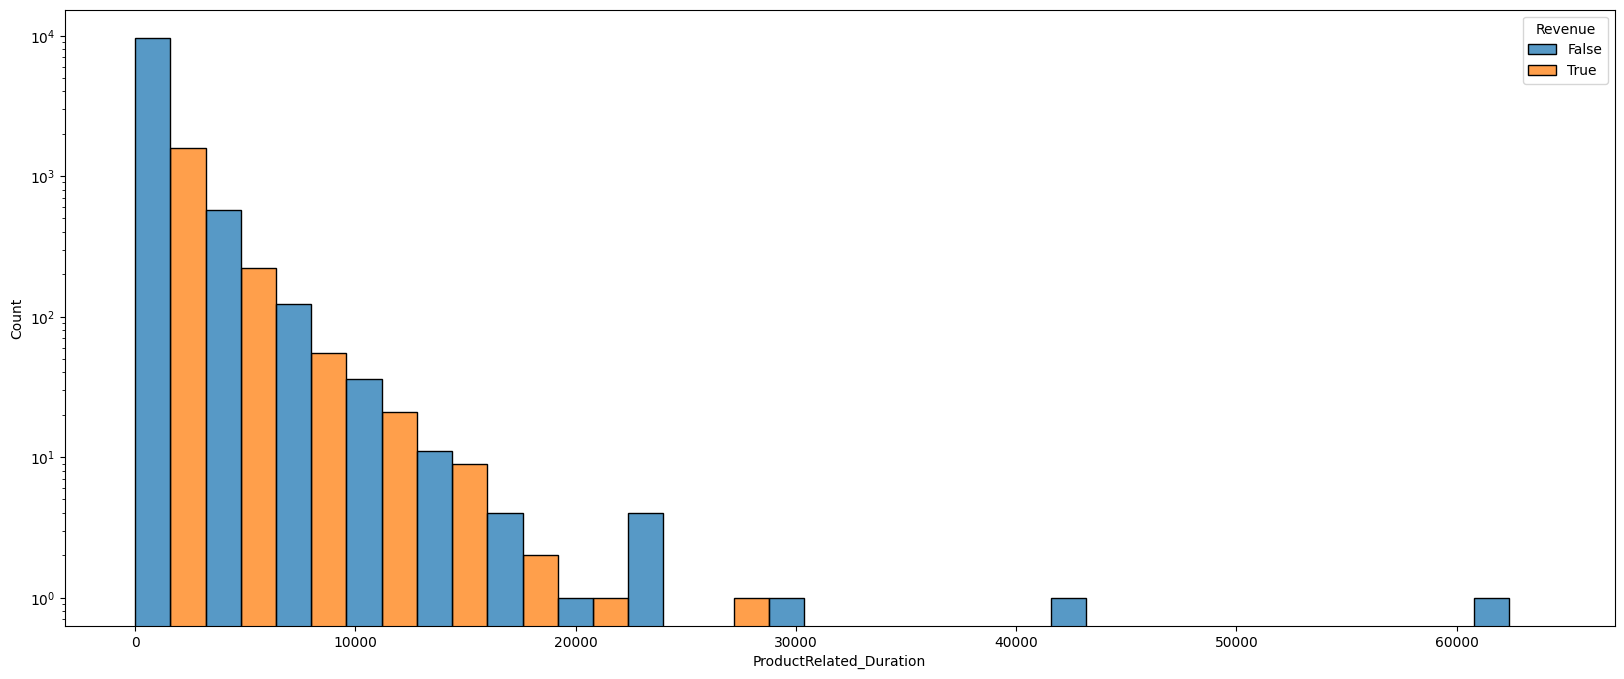

In [30]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "ProductRelated_Duration", hue = "Revenue", bins =20, multiple = "dodge")
plt.yscale("log")

In [40]:
shopping["BounceRates"].describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

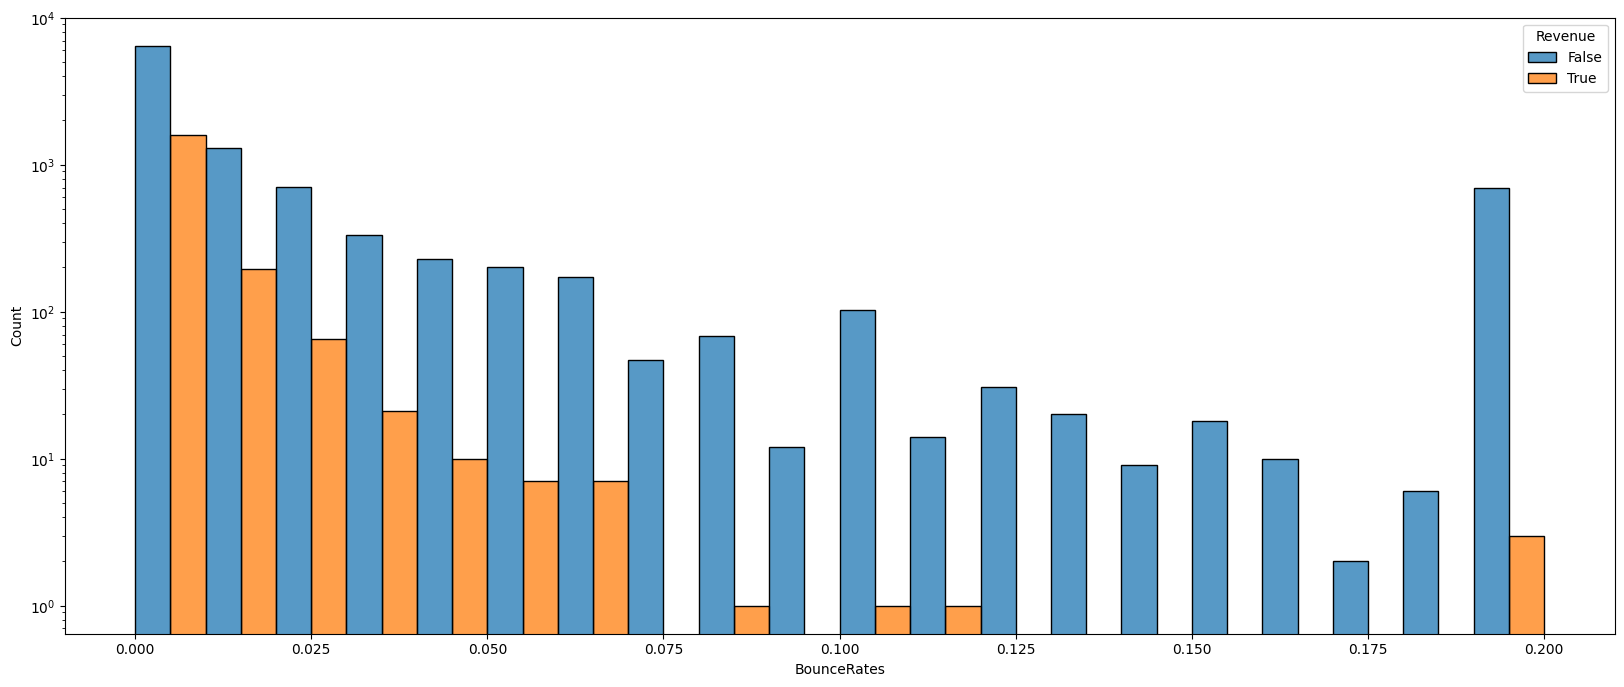

In [53]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "BounceRates", hue = "Revenue", bins = 20, multiple = "dodge")
plt.yscale("log")

<Axes: xlabel='BounceRates', ylabel='Density'>

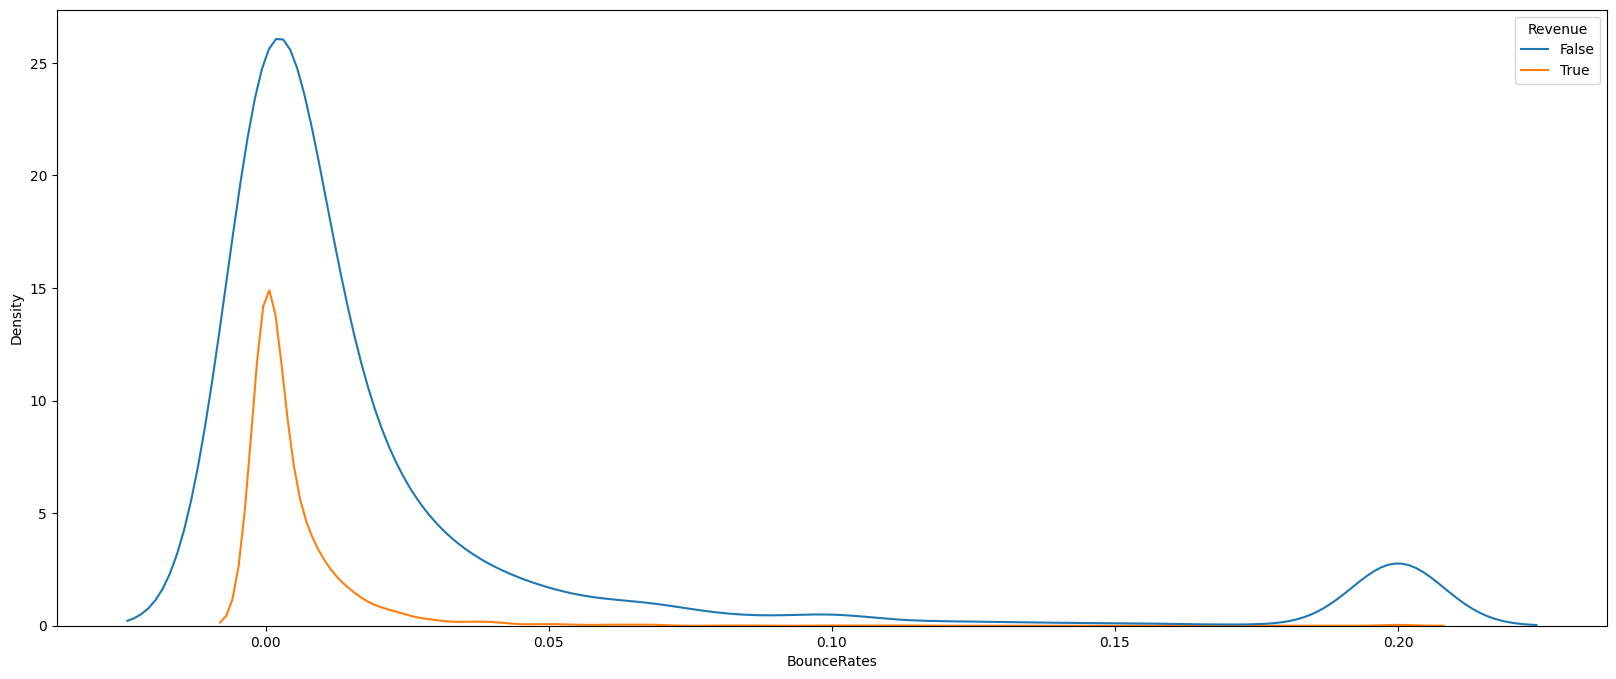

In [41]:
plt.figure(figsize =(20,8))
sns.kdeplot(data=shopping, x = "BounceRates", hue = "Revenue")

In [50]:
shopping["ExitRates"].describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

<Axes: xlabel='ExitRates'>

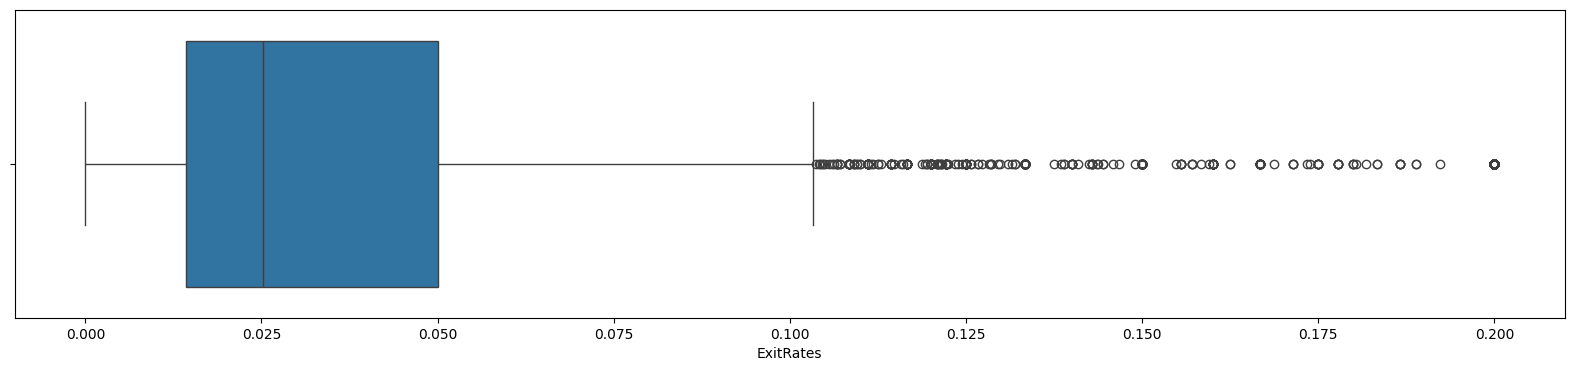

In [51]:
plt.figure(figsize =(20,4))
sns.boxplot(x= shopping["ExitRates"])

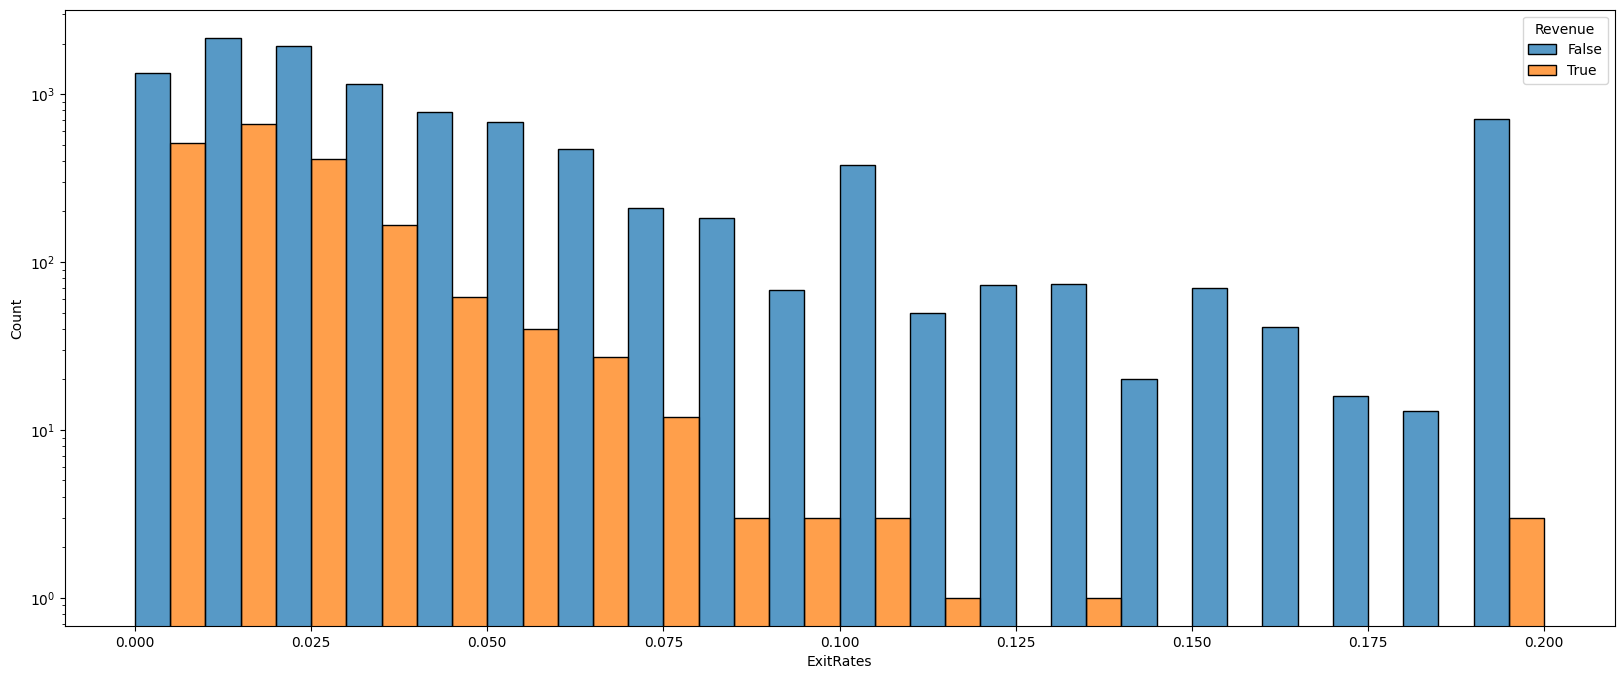

In [52]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "ExitRates", hue = "Revenue", bins = 20, multiple = "dodge")
plt.yscale("log")

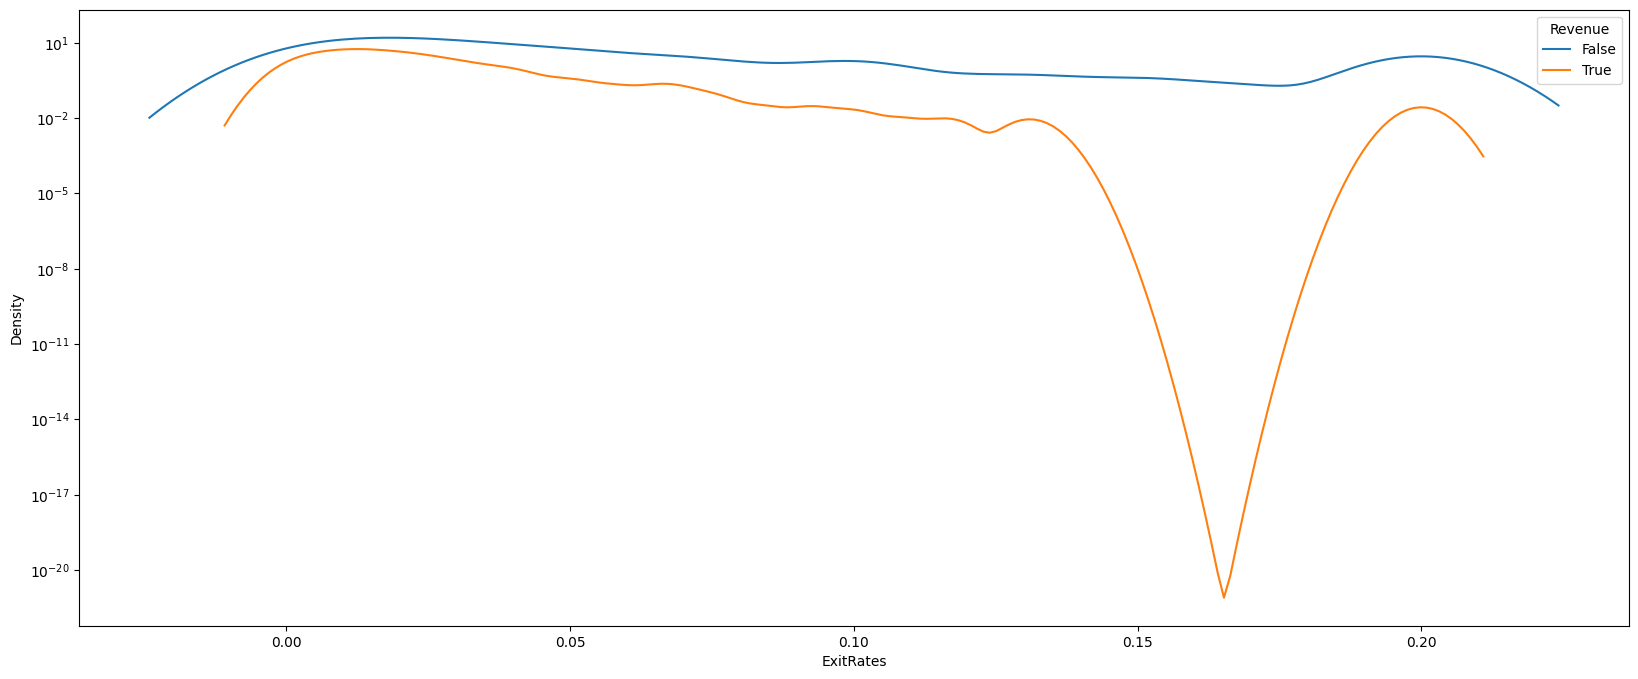

In [54]:
plt.figure(figsize =(20,8))
sns.kdeplot(data=shopping, x = "ExitRates", hue = "Revenue")
plt.yscale("log")

In [ ]:
shopping["PageValues"].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

<Axes: xlabel='PageValues'>

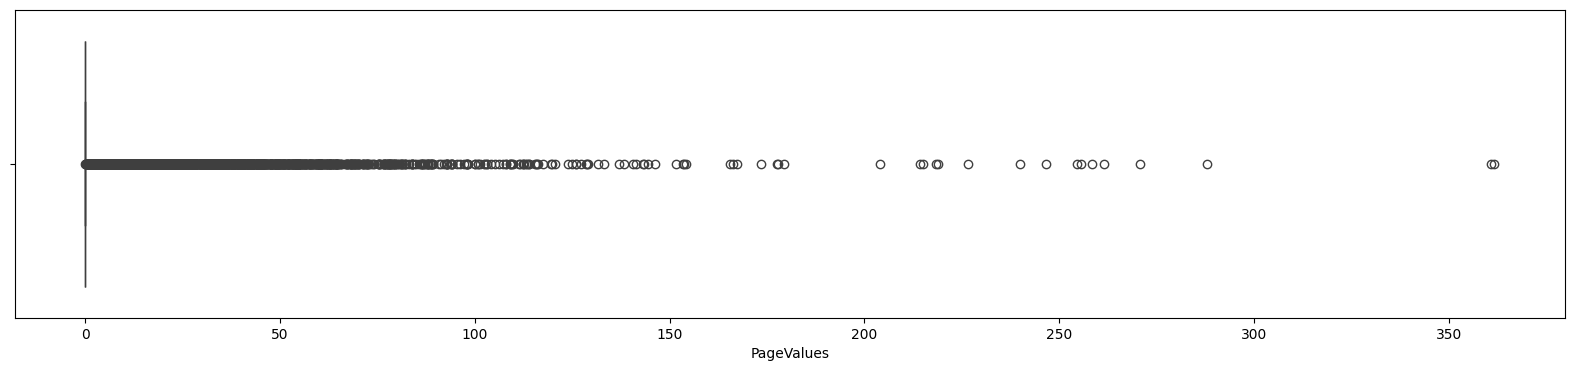

In [ ]:
plt.figure(figsize =(20,4))
sns.boxplot(x= shopping["PageValues"])

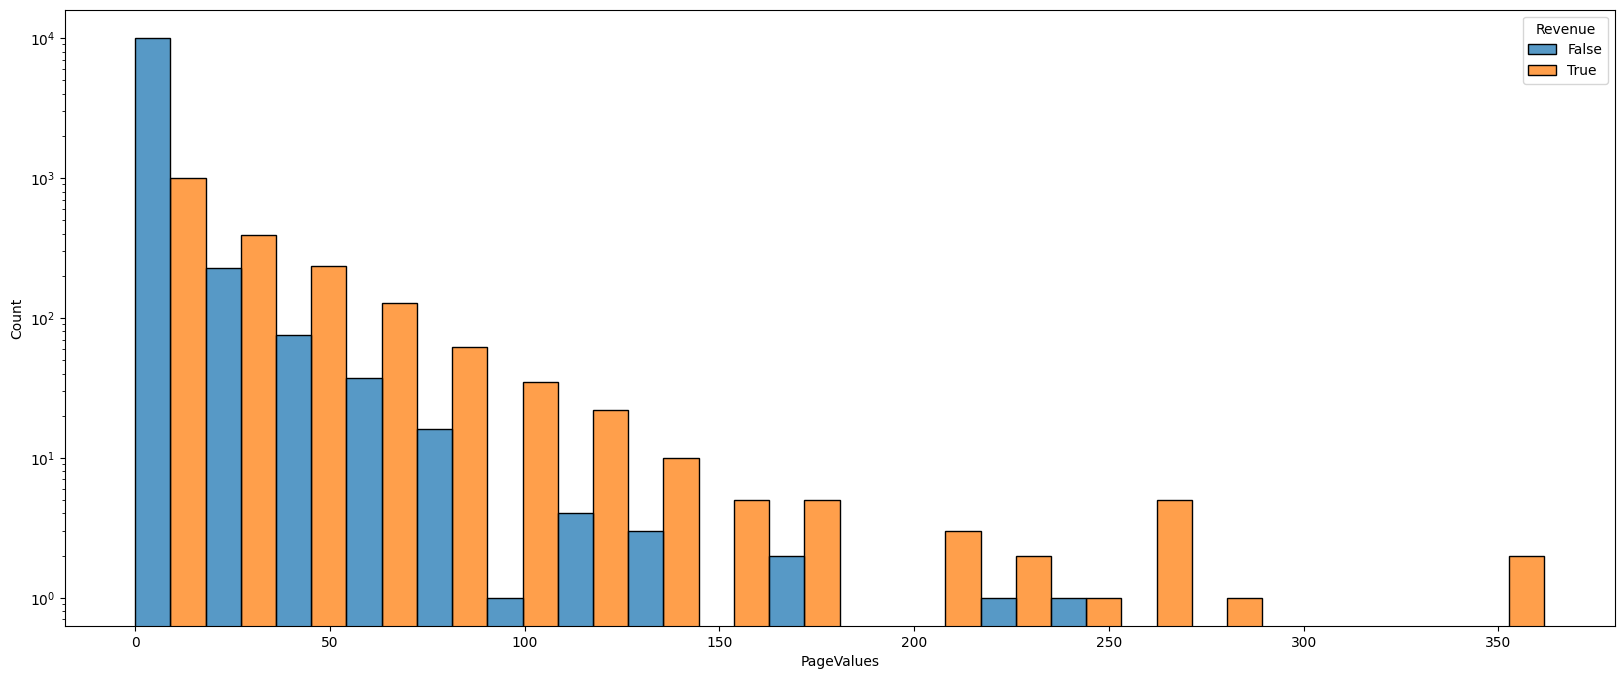

In [ ]:
plt.figure(figsize =(20,8))
sns.histplot(data=shopping, x = "PageValues", hue = "Revenue", bins = 20, multiple = "dodge")
plt.yscale("log")

In [55]:
shopping["SpecialDay"].describe()

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [56]:
shopping["SpecialDay"].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

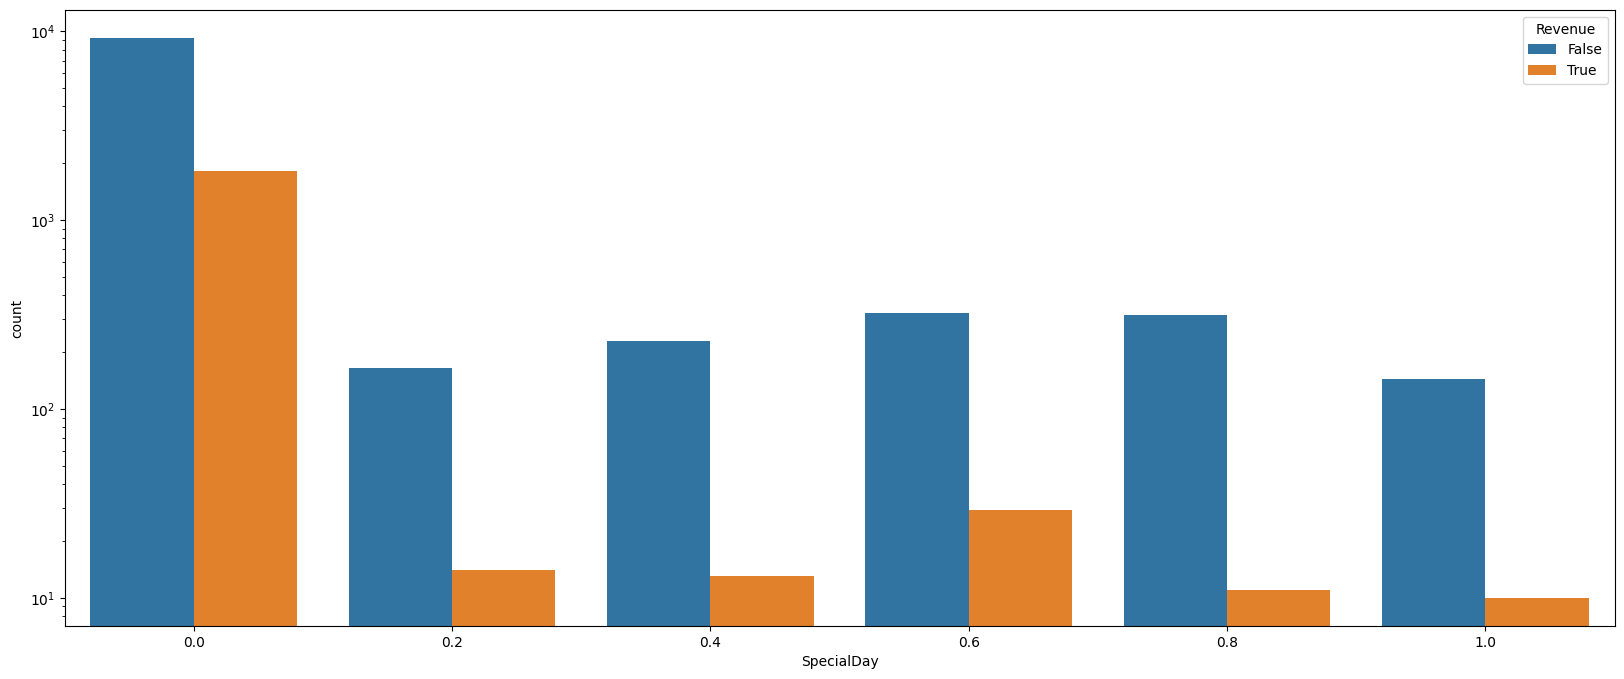

In [58]:
plt.figure(figsize =(20,8))
sns.countplot(data =shopping, x ="SpecialDay", hue="Revenue")
plt.yscale("log")

<Axes: xlabel='Month', ylabel='count'>

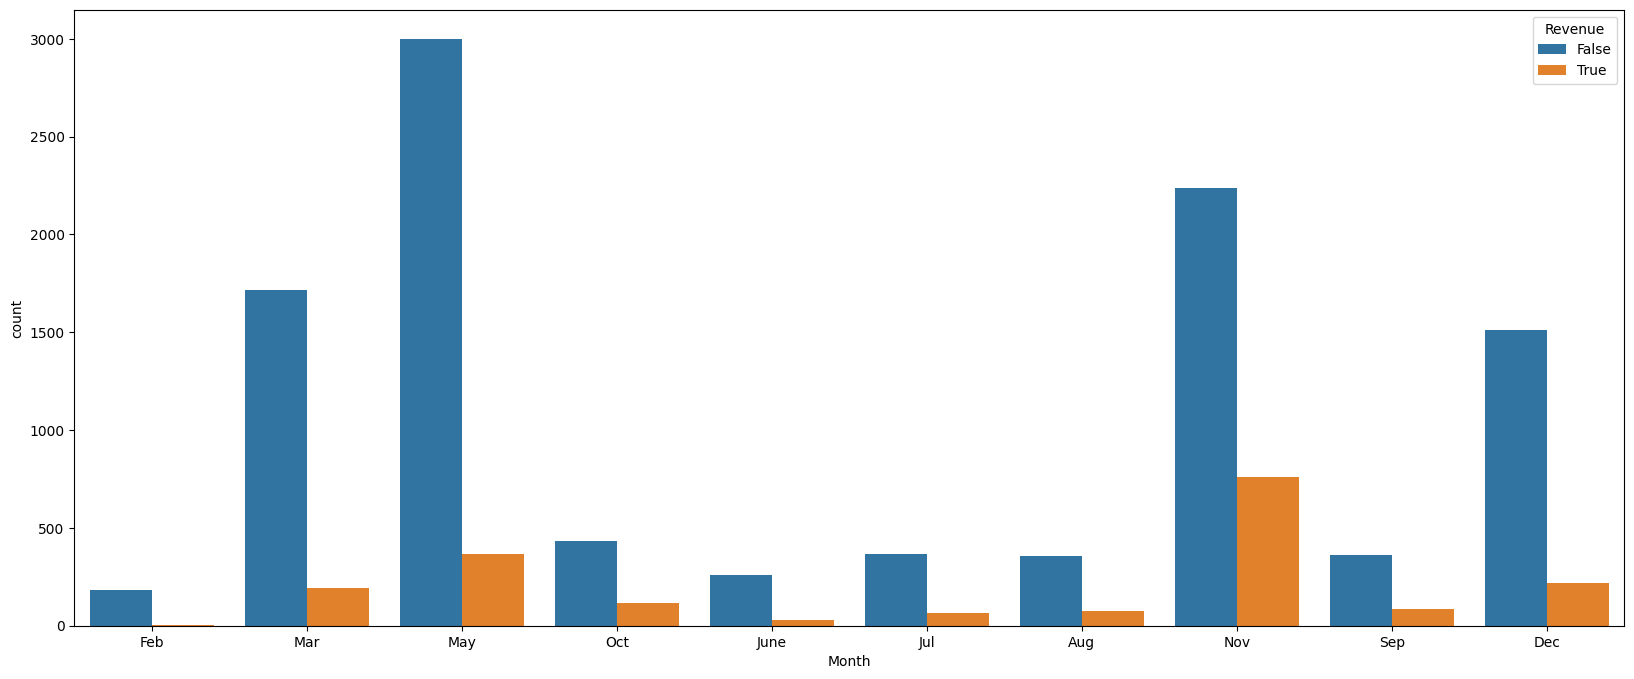

In [61]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Month", hue = "Revenue")

<Axes: xlabel='Revenue', ylabel='Month'>

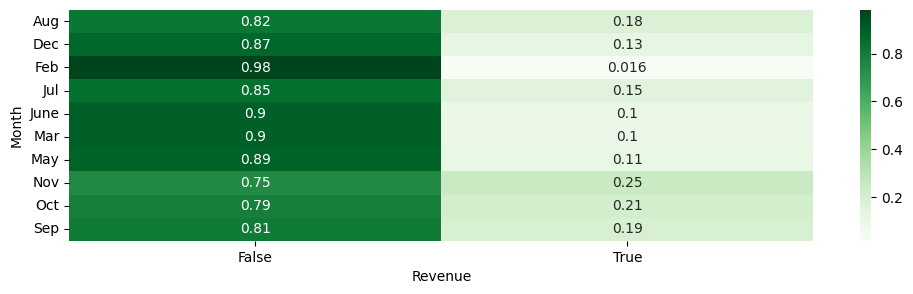

In [84]:
plt.figure(figsize = (12,3))
sns.heatmap(data=pd.crosstab(shopping["Month"], shopping["Revenue"], normalize = "index"),annot=True,cmap = "Greens")

<Axes: xlabel='OperatingSystems', ylabel='count'>

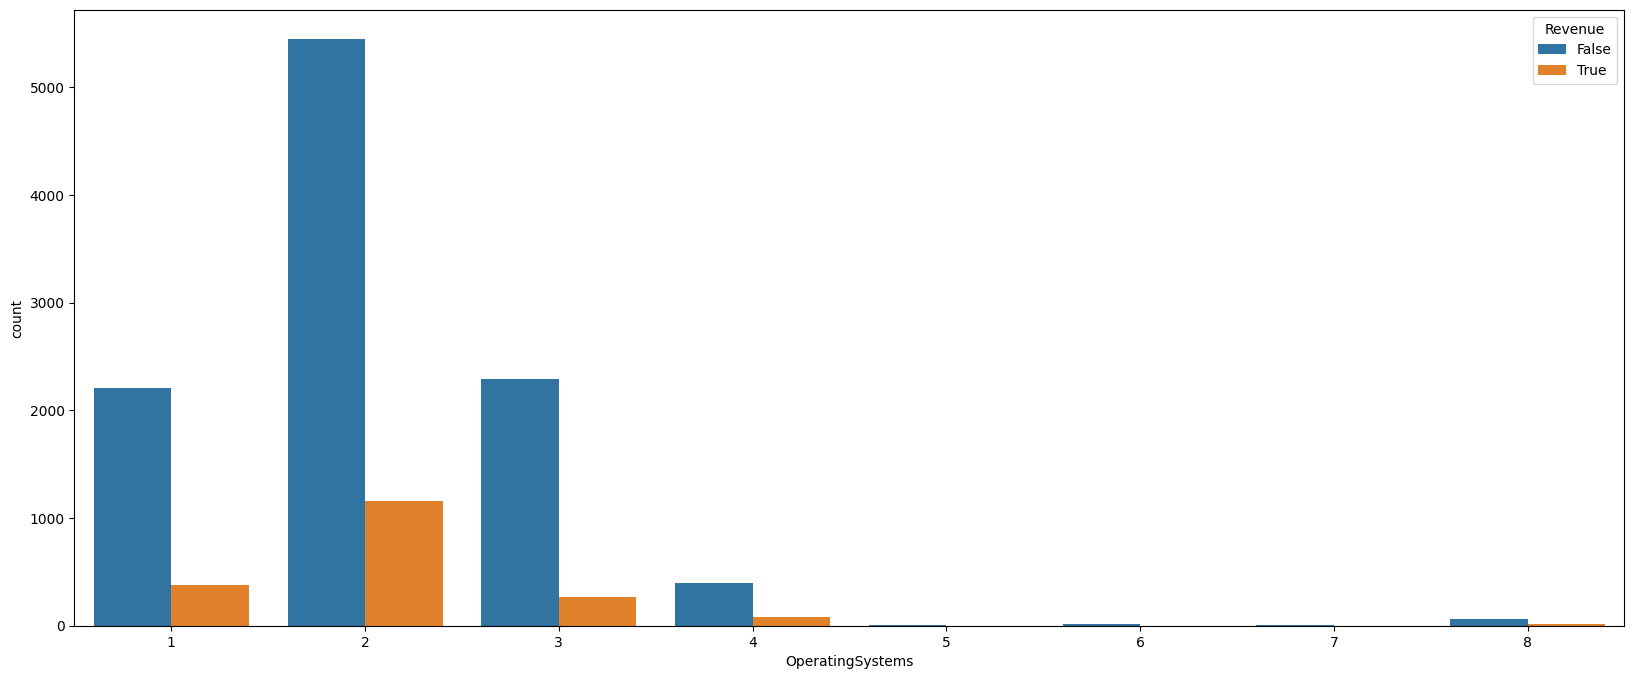

In [64]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "OperatingSystems", hue = "Revenue")

<Axes: xlabel='Browser', ylabel='count'>

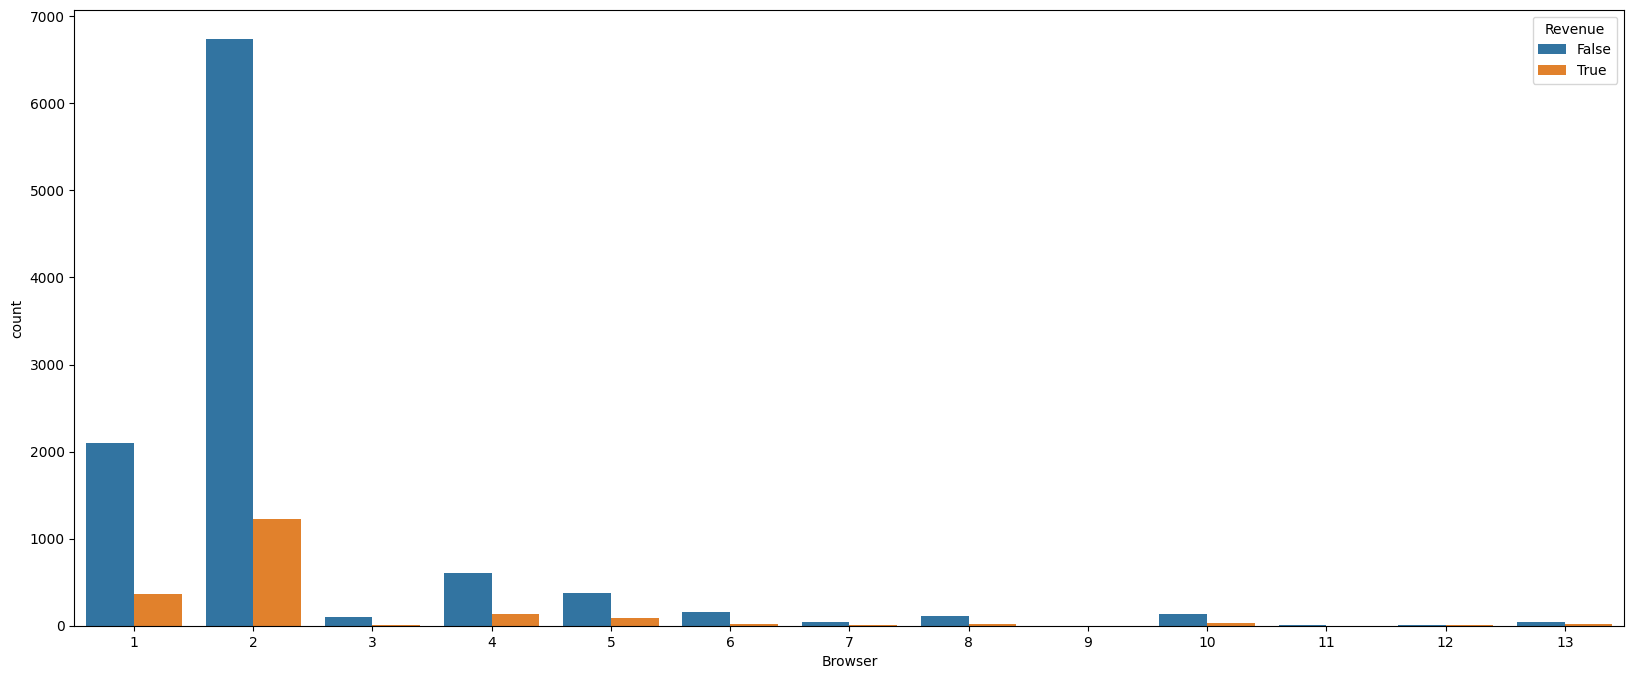

In [65]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Browser", hue = "Revenue")

<Axes: xlabel='Region', ylabel='count'>

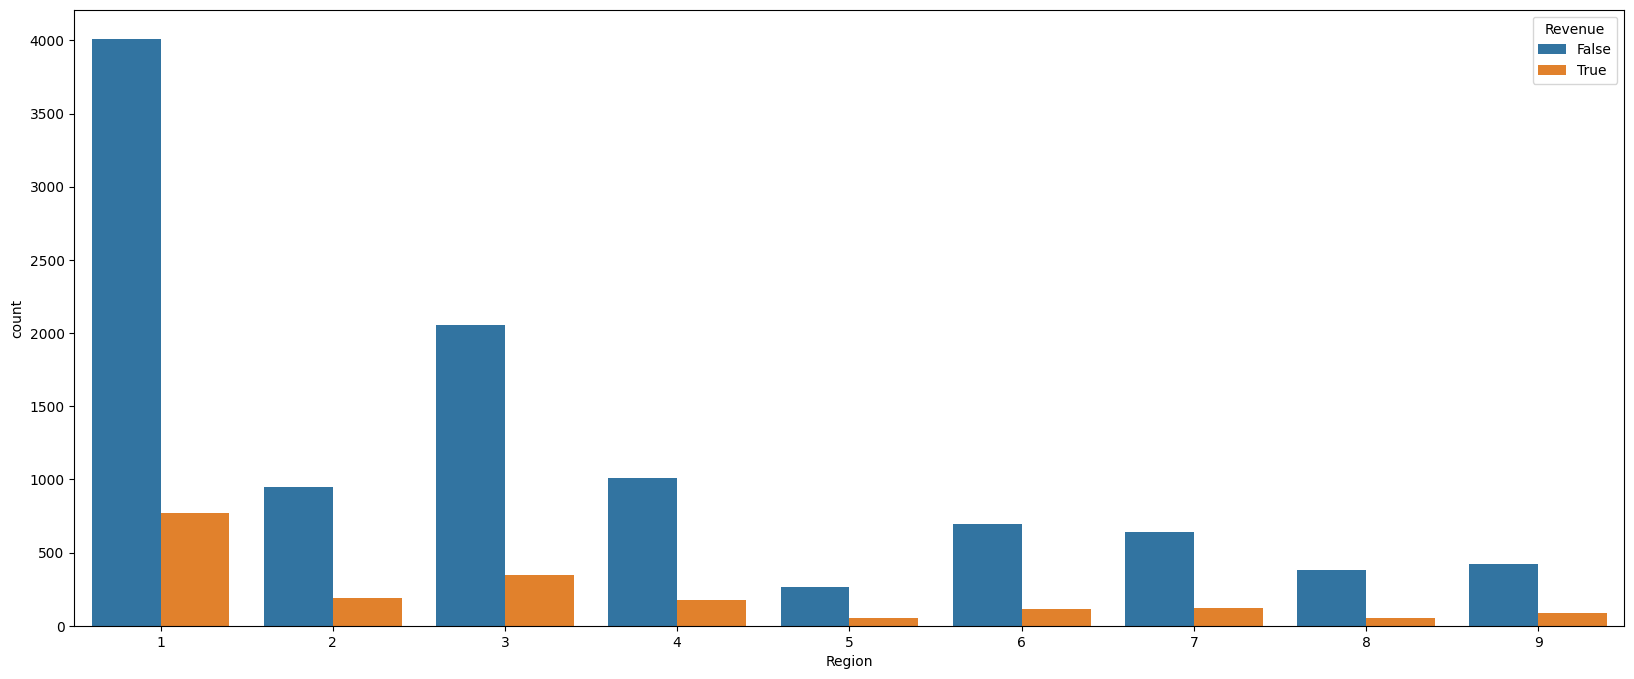

In [66]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Region", hue = "Revenue")

<Axes: xlabel='TrafficType', ylabel='count'>

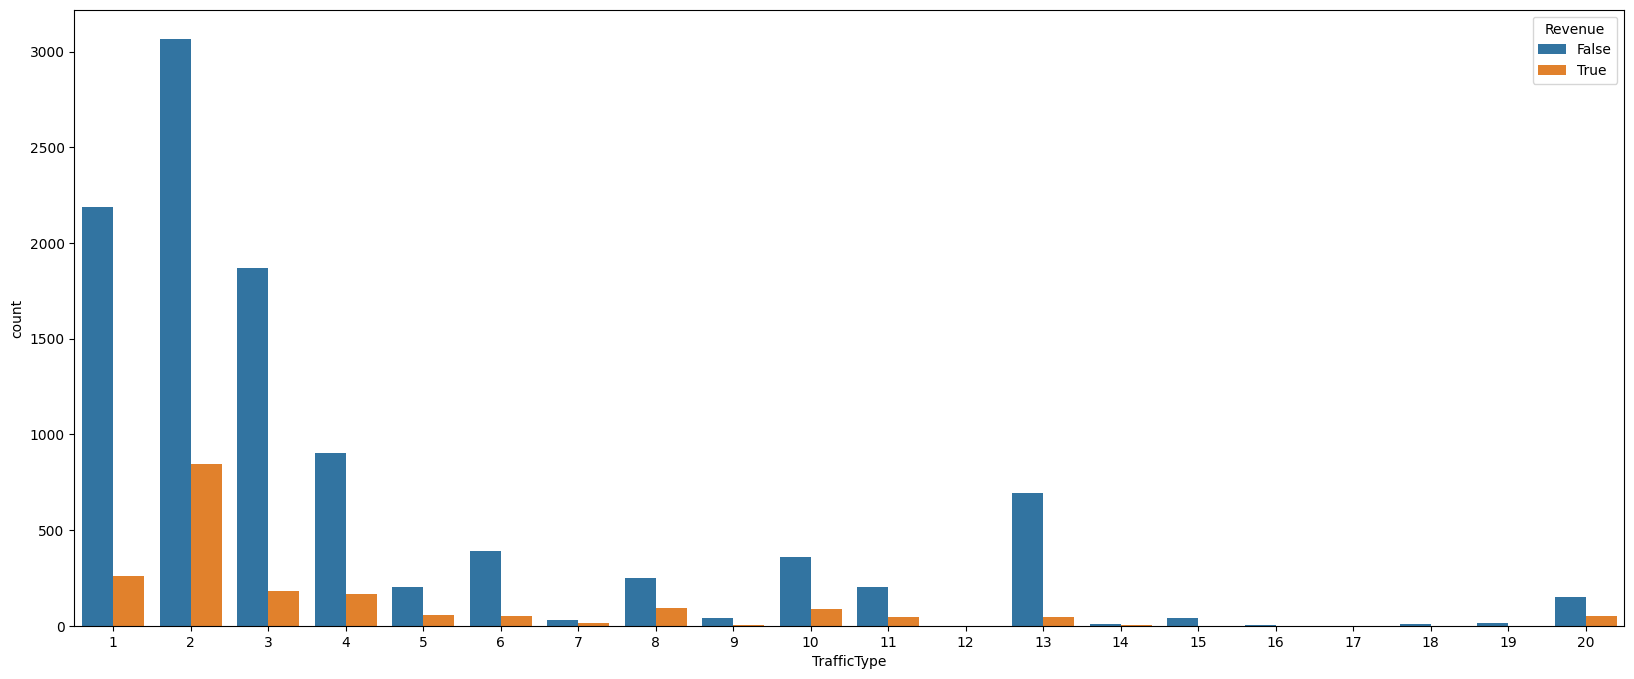

In [67]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "TrafficType", hue = "Revenue")

<Axes: xlabel='VisitorType', ylabel='count'>

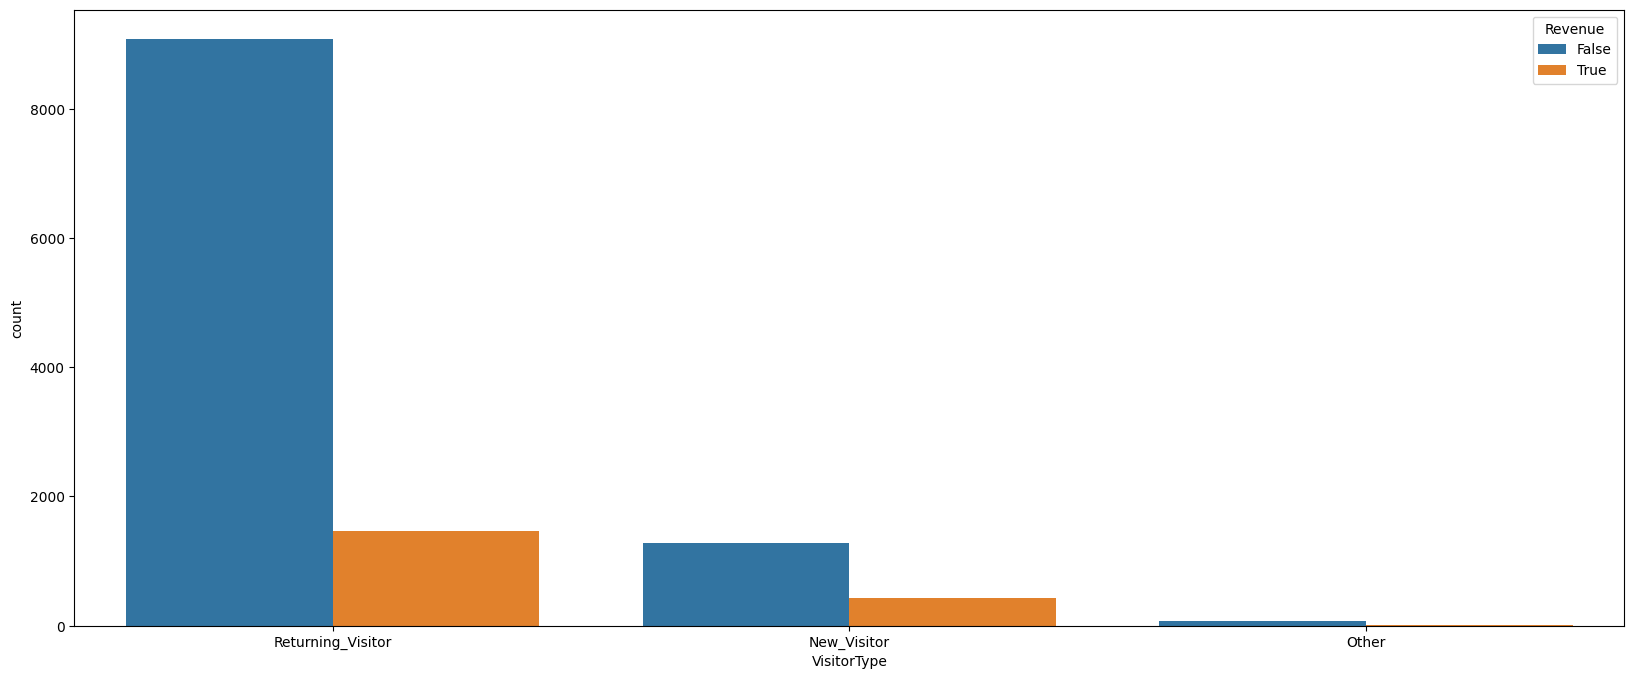

In [69]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "VisitorType", hue = "Revenue")

<Axes: xlabel='Revenue', ylabel='VisitorType'>

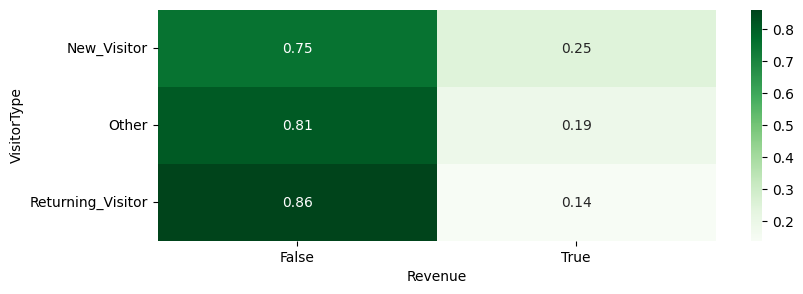

In [81]:
plt.figure(figsize = (9,3))
sns.heatmap(data=pd.crosstab(shopping["VisitorType"], shopping["Revenue"], normalize = "index"),annot=True,cmap = "Greens")

In [7]:
shopping.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: xlabel='Weekend', ylabel='count'>

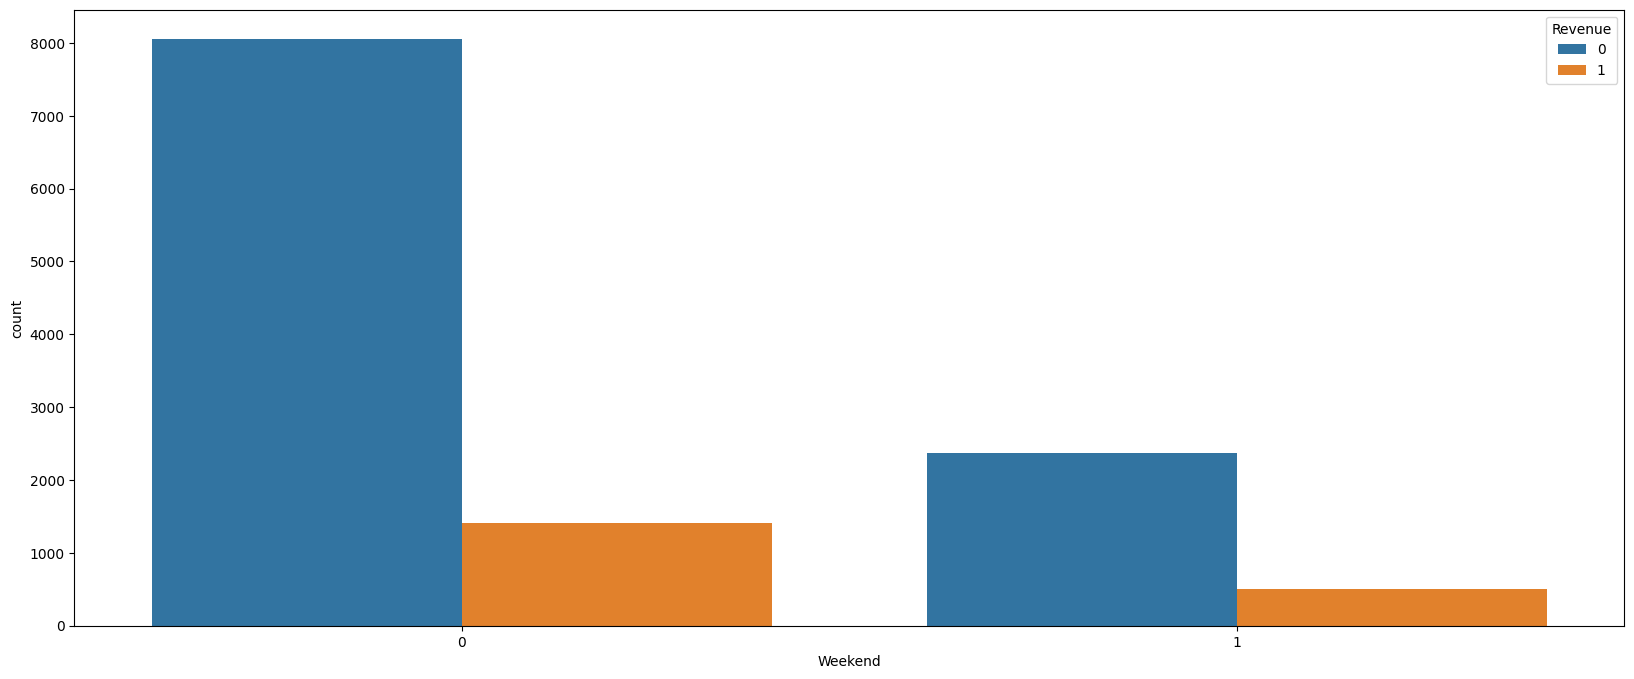

In [91]:
plt.figure(figsize =(20,8))
sns.countplot(data=shopping, x = "Weekend", hue = "Revenue")

<Axes: xlabel='Revenue', ylabel='Weekend'>

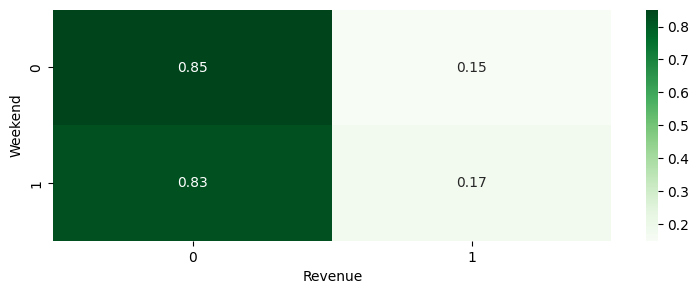

In [90]:
plt.figure(figsize = (9,3))
sns.heatmap(data=pd.crosstab(shopping["Weekend"], shopping["Revenue"], normalize = "index"),annot=True,cmap = "Greens")

In [71]:
shopping["Revenue"].value_counts(normalize = True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

In [73]:
shopping["Revenue"].value_counts().reset_index()

Revenue  count
0    False  10422
1     True   1908

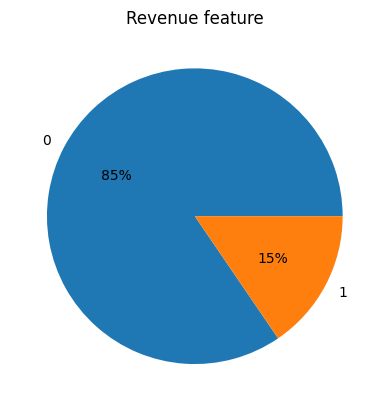

In [89]:
plt.pie(x = shopping["Revenue"].value_counts().reset_index()["count"],
        labels = shopping["Revenue"].value_counts().reset_index()["Revenue"],
        autopct='%.0f%%')
plt.title("Revenue feature")
plt.show()

In [88]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<Axes: >

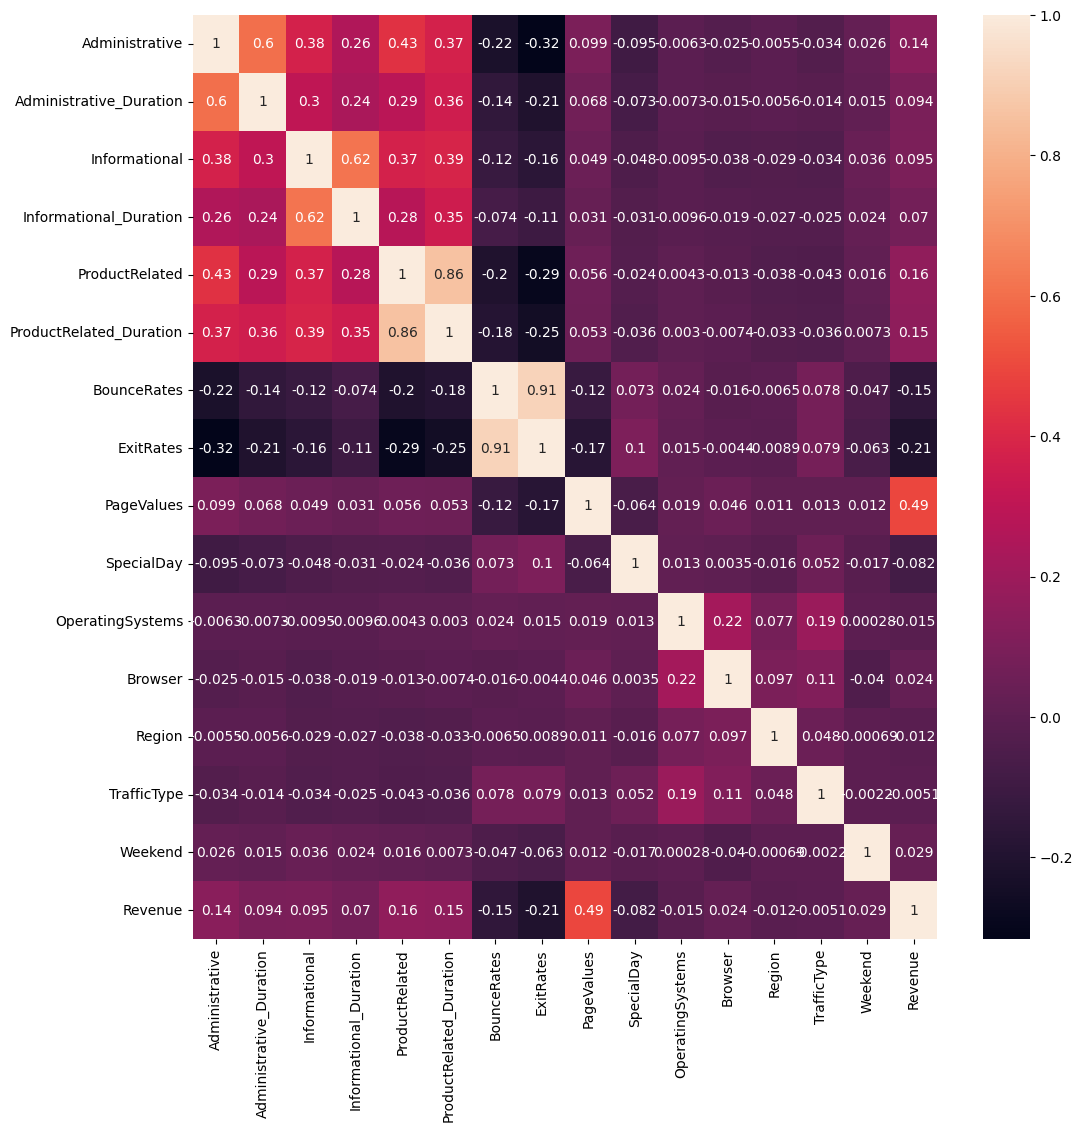

In [94]:
plt.figure(figsize = (12,12))
sns.heatmap(shopping.select_dtypes(include=np.number).corr(), annot = True)

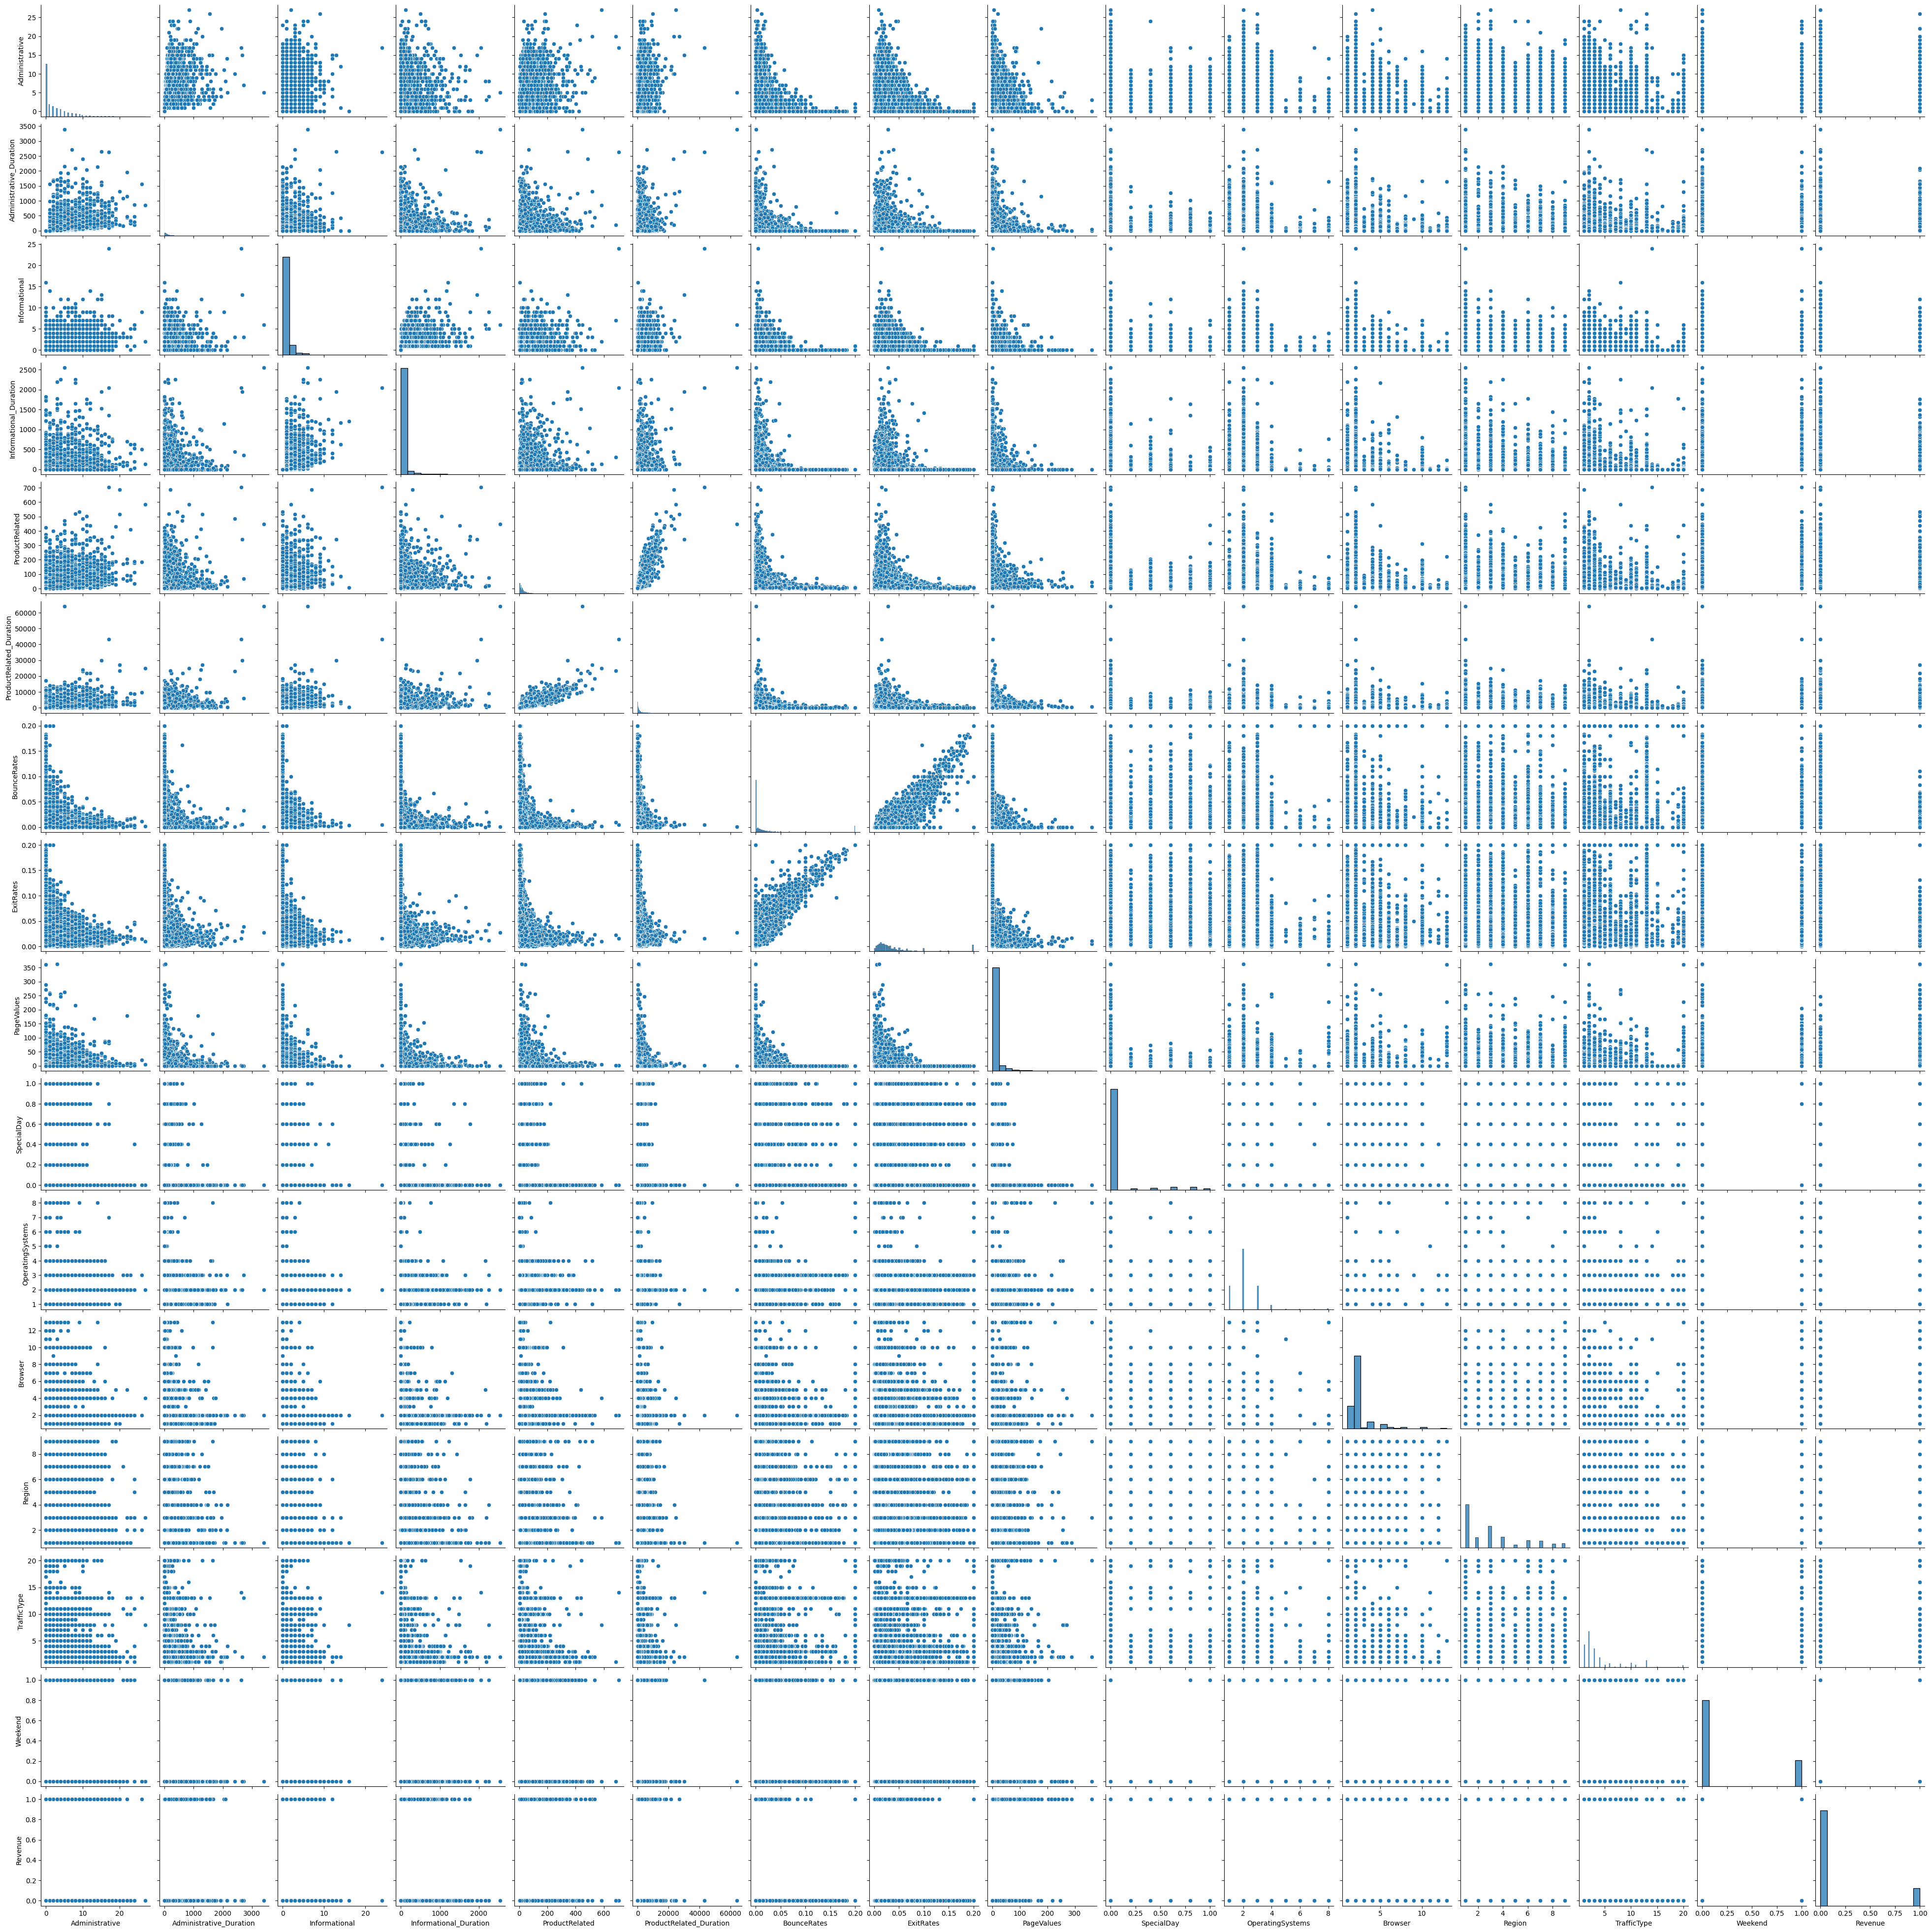

In [95]:
sns.pairplot(shopping)

# **Best Time to launch Analysis**

In [ ]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   int64         
 9   duration      6131 non-null   int64         
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 622.7+ KB


In [ ]:
weekday = data2.groupby([data2["date_added"].dt.day_name(),"type"])["title"].count().reset_index().sort_values("title",ascending = False)
weekday

date_added     type  title
0      Friday    Movie   1566
8    Thursday    Movie   1053
1      Friday  TV Show    932
12  Wednesday    Movie    906
10    Tuesday    Movie    852
2      Monday    Movie    628
6      Sunday    Movie    569
4    Saturday    Movie    557
13  Wednesday  TV Show    382
11    Tuesday  TV Show    345
9    Thursday  TV Show    343
5    Saturday  TV Show    259
3      Monday  TV Show    223
7      Sunday  TV Show    182

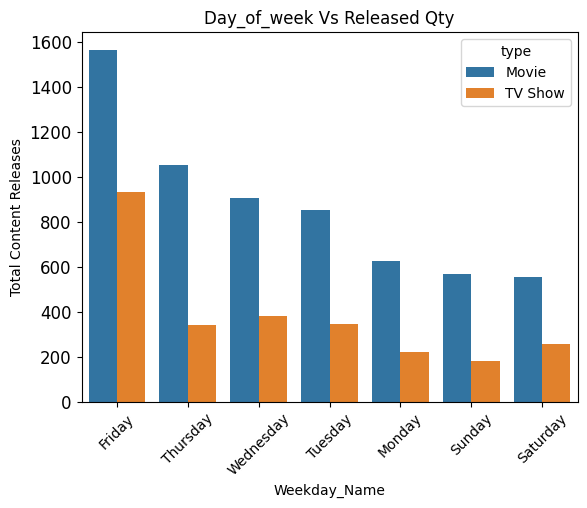

In [ ]:
sns.barplot(data =weekday ,x ="date_added",y= "title", hue="type" )
plt.title("Day_of_week Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Weekday_Name",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [ ]:
week = data2.groupby([data2["date_added"].dt.week,"type"])["title"].count().reset_index().sort_values("title",ascending = False)
week

<ipython-input-87-e04e4ef922dd>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = data2.groupby([data2["date_added"].dt.week,"type"])["title"].count().reset_index().sort_values("title",ascending = False)


date_added     type  title
0          1.0    Movie    316
86        44.0    Movie    243
78        40.0    Movie    215
16         9.0    Movie    207
50        26.0    Movie    195
..         ...      ...    ...
5          3.0  TV Show     32
7          4.0  TV Show     32
3          2.0  TV Show     30
19        10.0  TV Show     28
85        43.0  TV Show     28

[106 rows x 3 columns]

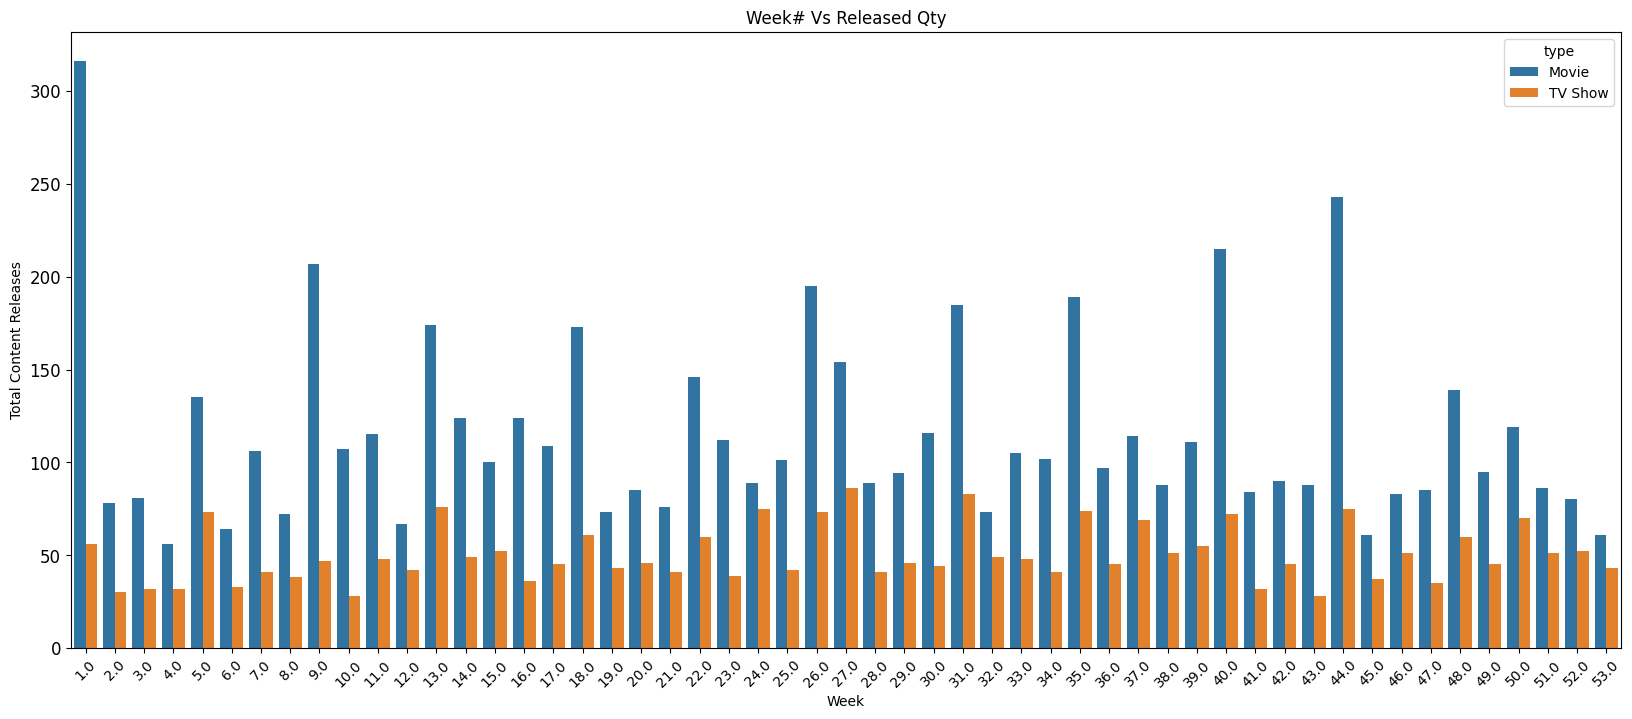

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(data =week ,x ="date_added",y= "title", hue="type" )
plt.title("Week# Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Week",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [ ]:
month = data2.groupby([data2["date_added"].dt.month_name(),"type"])["title"].count().reset_index().sort_values("title",ascending = False)
month

date_added     type  title
10       July    Movie    565
0       April    Movie    550
4    December    Movie    547
8     January    Movie    546
20    October    Movie    545
14      March    Movie    529
2      August    Movie    519
22  September    Movie    519
18   November    Movie    498
12       June    Movie    492
16        May    Movie    439
6    February    Movie    382
5    December  TV Show    266
11       July  TV Show    262
23  September  TV Show    251
13       June  TV Show    236
3      August  TV Show    236
21    October  TV Show    215
1       April  TV Show    214
15      March  TV Show    213
19   November  TV Show    207
17        May  TV Show    193
9     January  TV Show    192
7    February  TV Show    181

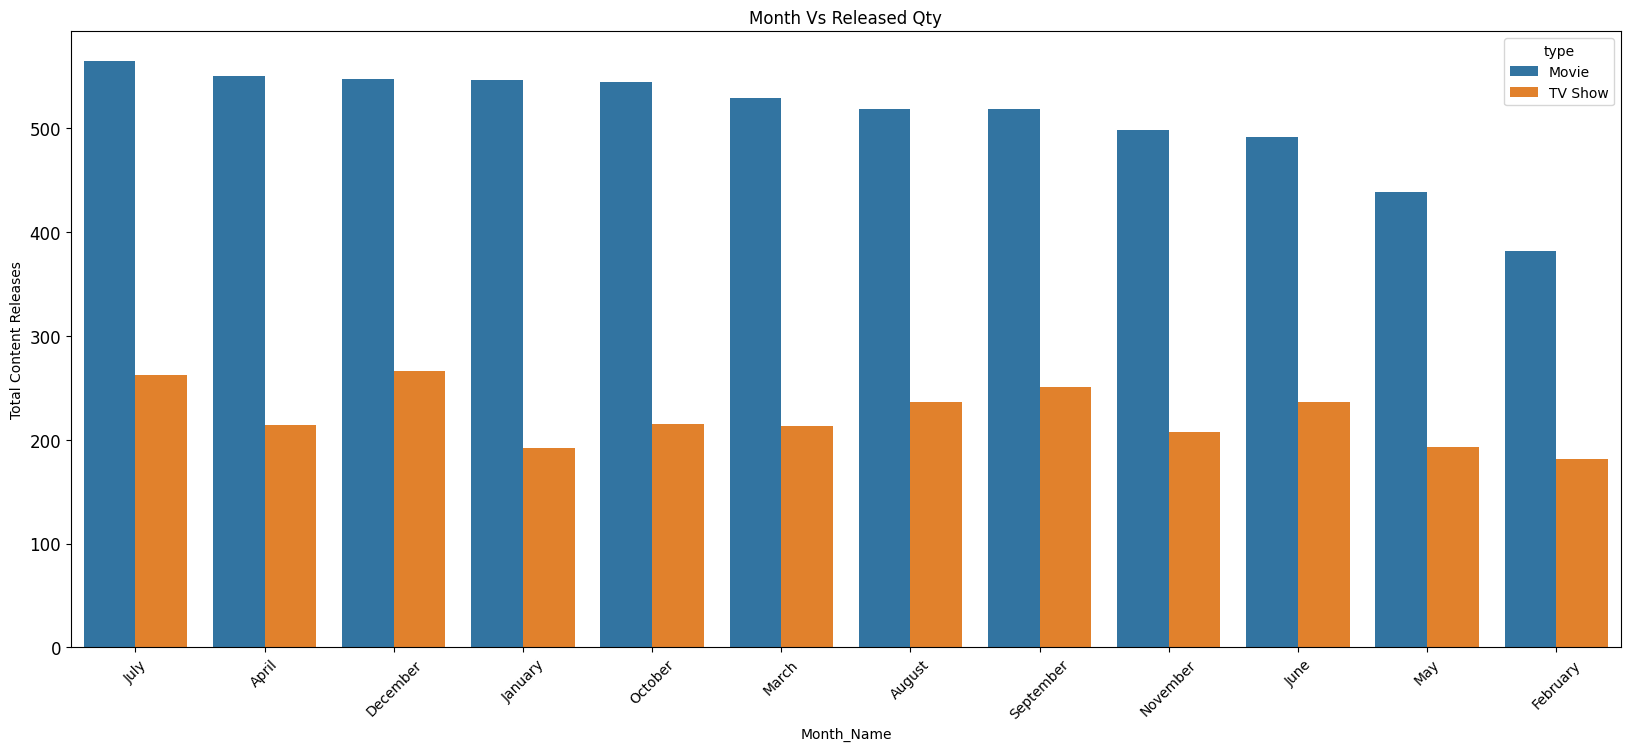

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(data =month ,x ="date_added",y= "title", hue="type" )
plt.title("Month Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Month_Name",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()



* In a Week, Best Day for Relase is Friday
* In a Year,Best Week for Release is First week of Every month , as we can see spike in release every 4 weeks from year's 1st week
* In a Year,No specific Best month for release, July has highest releases, But Decemeber+January has Highest release may be due to holidays
* Overall Best time to release is First week of Year

---



---






# **Analysis of Directors**

In [ ]:
moviedirector = moviedata.explode("director")
moviedirector = moviedirector.groupby("director")["title"].count().sort_values(ascending=False).reset_index()
moviedirector

director  title
0        Rajiv Chilaka     22
1            Jan Suter     21
2          Raúl Campos     19
3          Suhas Kadav     16
4         Marcus Raboy     15
...                ...    ...
4772       José Ortuño      1
4773   Bob Persichetti      1
4774  Jovanka Vuckovic      1
4775      Bob Odenkirk      1
4776       Awi Suryadi      1

[4777 rows x 2 columns]

In [ ]:
tvshowdirector = tvshowdata.explode("director")
tvshowdirector = tvshowdirector.groupby("director")["title"].count().sort_values(ascending=False).reset_index()
tvshowdirector

director  title
0              Ken Burns      3
1    Alastair Fothergill      3
2            Stan Lathan      2
3             Jung-ah Im      2
4          Joe Berlinger      2
..                   ...    ...
294          Hong Won-ki      1
295     Hiroyuki Seshita      1
296          Hikaru Toda      1
297    Hernán Guerschuny      1
298         Ziad Doueiri      1

[299 rows x 2 columns]

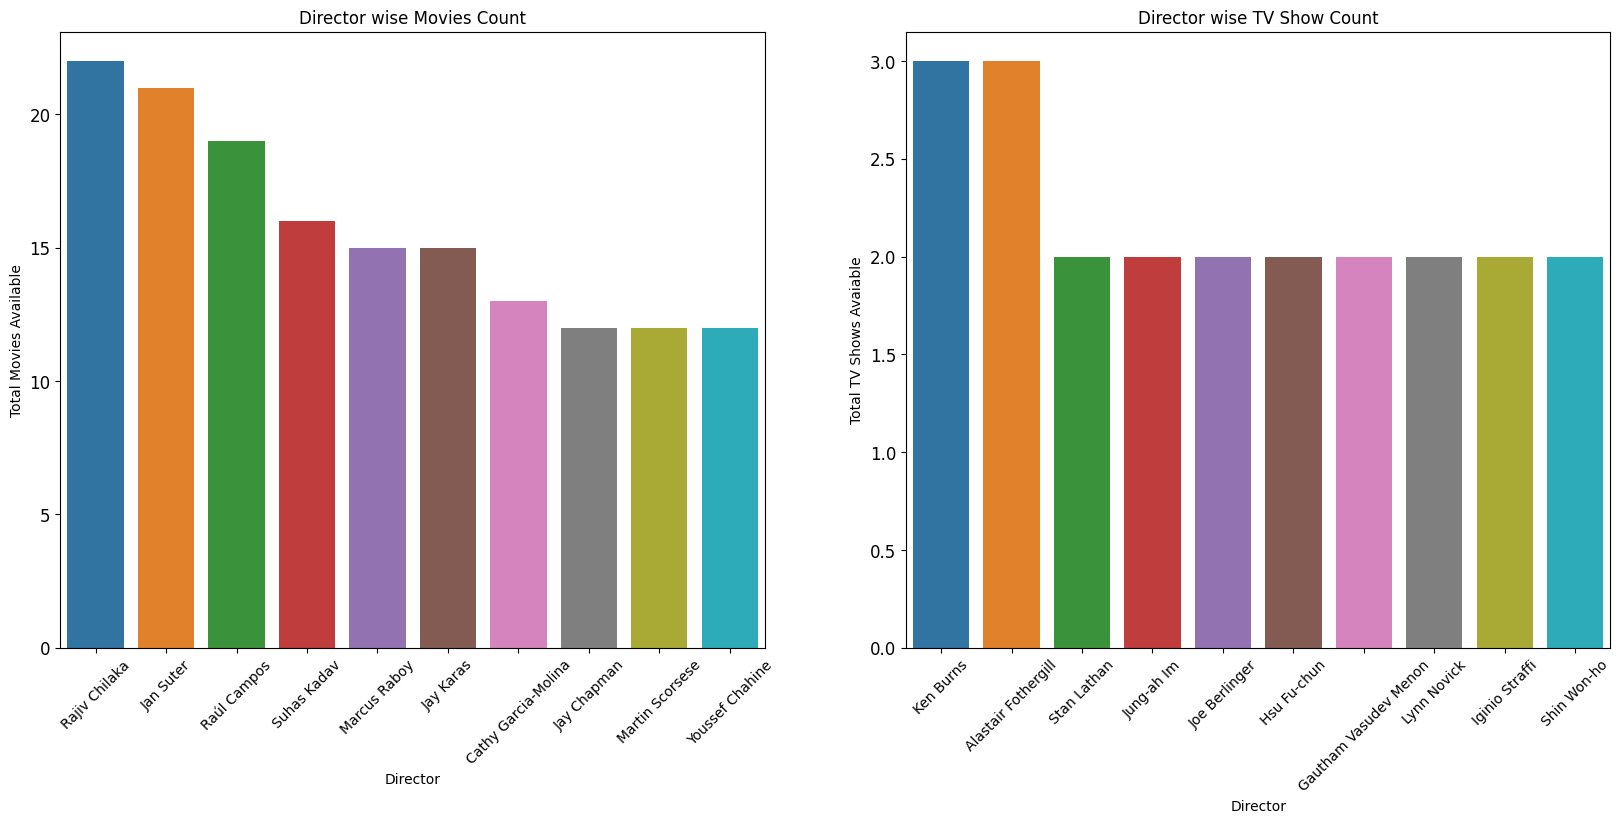

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = moviedirector.iloc[:10], x="director",y="title")
plt.title("Director wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Director",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowdirector.iloc[:10], x="director",y="title")
plt.title("Director wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Director",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* There are 4777 Nos Director in Movie Content
* there are 299 Nos Director in TV Show Content
* Rajiv Chilaka has directed most movies
* Ken Burns has directed most TV Shows

---



---



# **Analysis of Cast**

In [ ]:
moviecast = moviedata.explode("cast")
moviecast = moviecast.groupby("cast")["title"].count().sort_values(ascending=False).reset_index()
moviecast

cast  title
0           Anupam Kher     42
1        Shah Rukh Khan     35
2      Naseeruddin Shah     32
3               Om Puri     30
4          Akshay Kumar     30
...                 ...    ...
25946      Jacob Buster      1
25947       Jacob Blair      1
25948    Jacob Bertrand      1
25949     Jacob Batalon      1
25950      Ṣọpẹ́ Dìrísù      1

[25951 rows x 2 columns]

In [ ]:
tvshowcast = tvshowdata.explode("cast")
tvshowcast = tvshowcast.groupby("cast")["title"].count().sort_values(ascending=False).reset_index()
tvshowcast

cast  title
0           Takahiro Sakurai     25
1                  Yuki Kaji     19
2             Junichi Suwabe     17
3                Daisuke Ono     17
4                  Ai Kayano     17
...                      ...    ...
14858                Ivy Yin      1
14859          Iván Pellicer      1
14860  Iván Álvarez de Araya      1
14861            Iza Moreira      1
14862         Şükrü Özyıldız      1

[14863 rows x 2 columns]

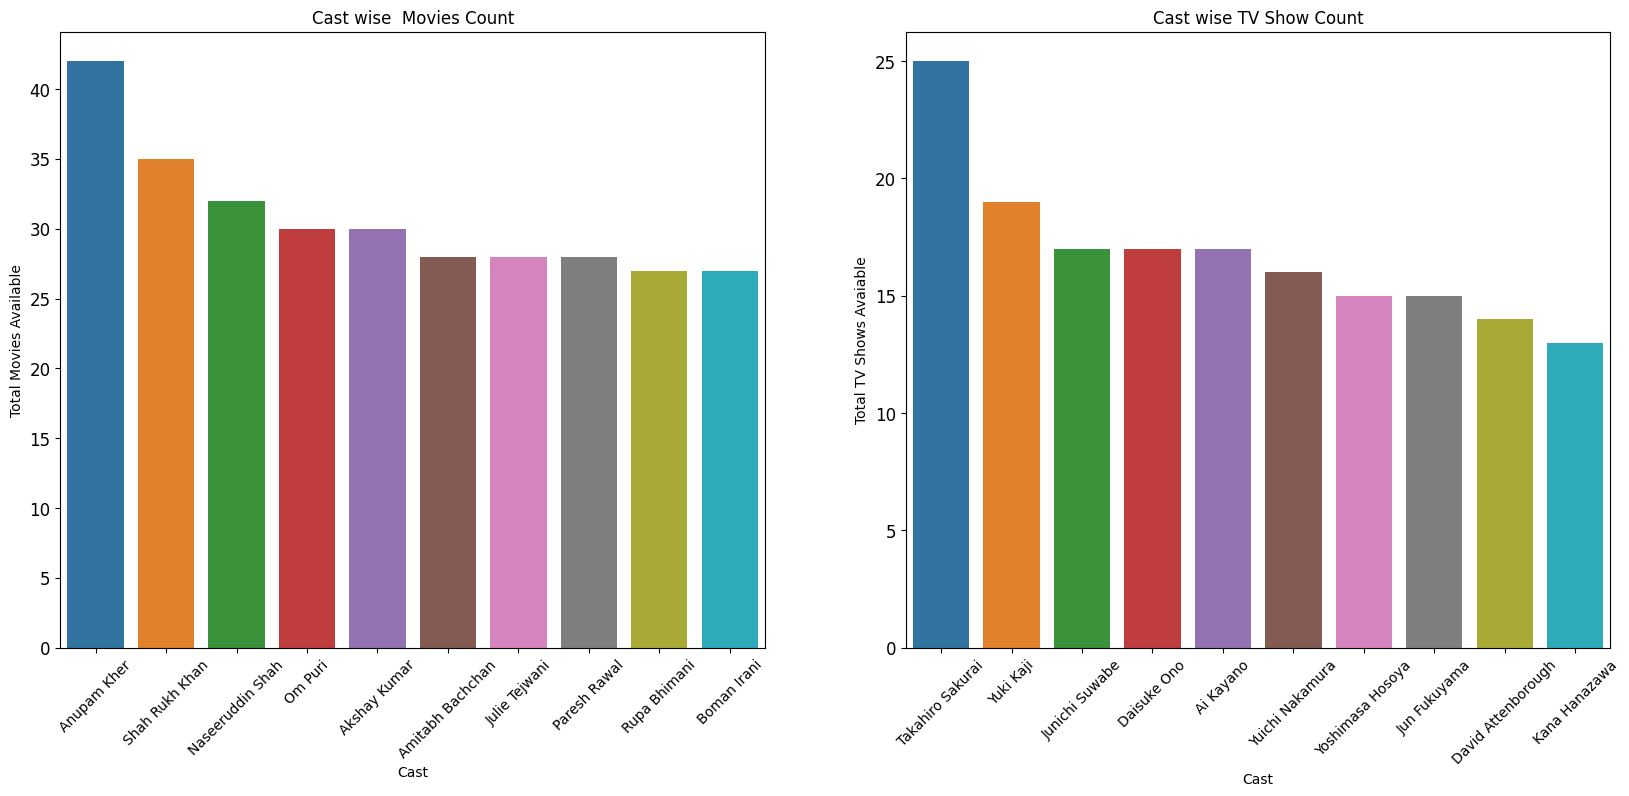

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = moviecast.iloc[:10], x="cast",y="title")
plt.title("Cast wise  Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Cast",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowcast.iloc[:10], x="cast",y="title")
plt.title("Cast wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Cast",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* There are 25951 Nos Different Cast in Movie Content
* There are 14863 Nos Different Cast in TV Show Content
* Anupam Kher has Acted most movies
* Takahiro Sakurai has acted in most TV Shows

---



---



# **Analysis of Rating**

Note: Ratings has been changed from Categorical to Numerical

*   1 --> Very Child Friendly
*   9 --> Stricly adult Content
*   10 -->Not Rated , NAN, other data like 74 min,84min,66min

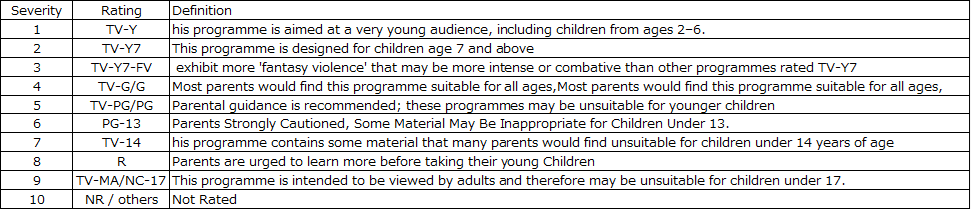








In [ ]:
movierating = moviedata.groupby("rating")["title"].count().reset_index().sort_values("rating")
movierating

rating  title
0       1    131
1       2    139
2       3      5
3       4    167
4       5    827
5       6    490
6       7   1427
7       8    797
8       9   2065
9      10     83

In [ ]:
tvshowrating = tvshowdata.groupby("rating")["title"].count().reset_index().sort_values("rating")
tvshowrating

rating  title
0       1    176
1       2    195
2       3      1
3       4     94
4       5    323
5       7    733
6       8      2
7       9   1145
8      10      7

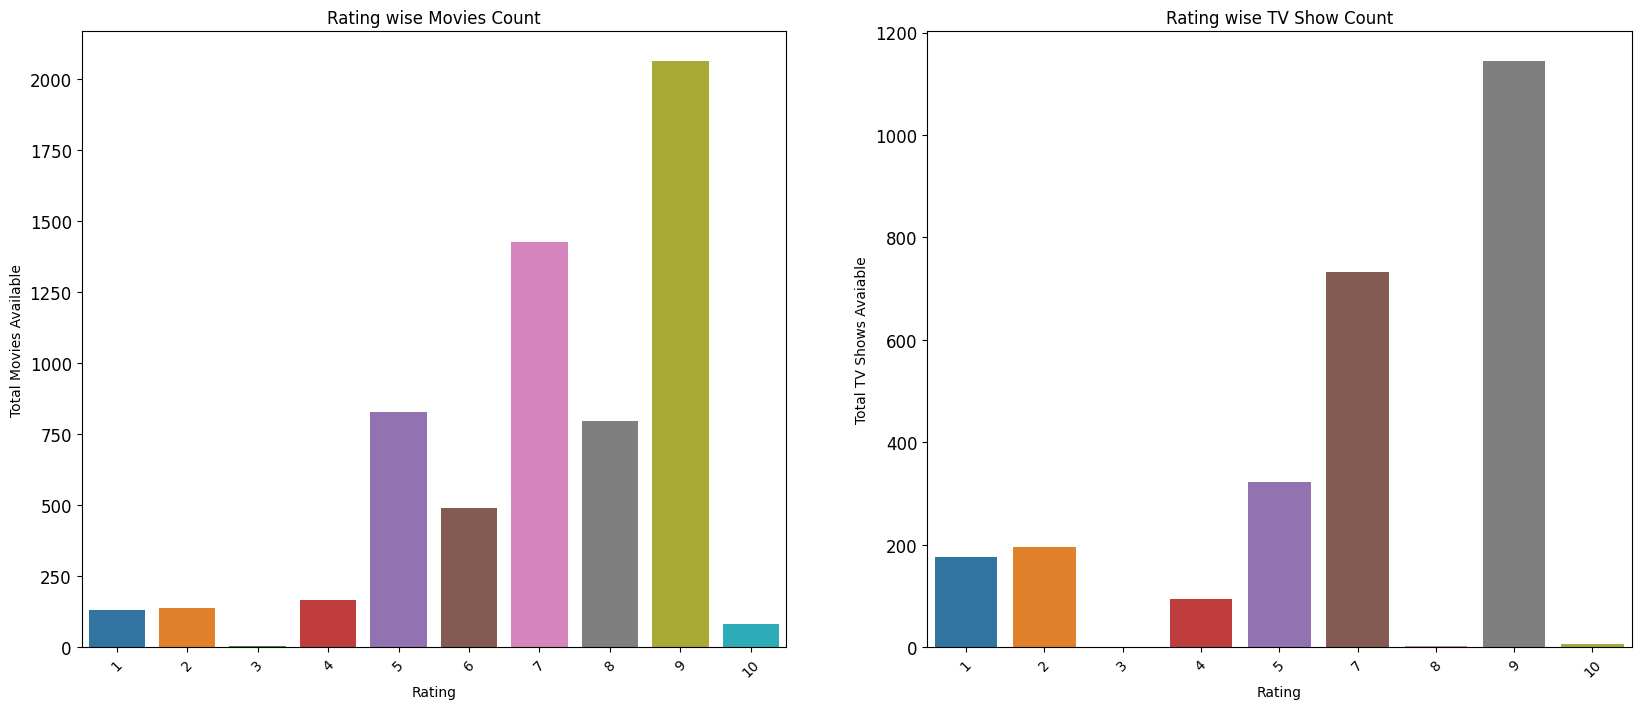

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data= movierating, x="rating",y="title")
plt.title("Rating wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Rating",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowrating, x="rating",y="title")
plt.title("Rating wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Rating",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

*   88% Content Avaible is Either Matured Content or Where Parental Guidance is Needed
*   Content avaiable for children is very less compared to content avaialable for matured Audience

---



---








# **Analysis of Genre**

In [ ]:
moviegenre = moviedata.explode("listed_in")
moviegenre = moviegenre.groupby("listed_in")["title"].count().sort_values(ascending = False).reset_index()
moviegenre

listed_in  title
0       International Movies   2752
1                     Dramas   2427
2                   Comedies   1674
3              Documentaries    869
4         Action & Adventure    859
5         Independent Movies    756
6   Children & Family Movies    641
7            Romantic Movies    616
8                  Thrillers    577
9           Music & Musicals    375
10             Horror Movies    357
11           Stand-Up Comedy    343
12          Sci-Fi & Fantasy    243
13             Sports Movies    219
14            Classic Movies    116
15              LGBTQ Movies    102
16               Cult Movies     71
17            Anime Features     71
18      Faith & Spirituality     65
19                    Movies     57

In [ ]:
tvshowgenre = tvshowdata.explode("listed_in")
tvshowgenre = tvshowgenre.groupby("listed_in")["title"].count().sort_values(ascending = False).reset_index()
tvshowgenre

listed_in  title
0         International TV Shows   1351
1                      TV Dramas    763
2                    TV Comedies    581
3                 Crime TV Shows    470
4                       Kids' TV    451
5                     Docuseries    395
6              Romantic TV Shows    370
7                     Reality TV    255
8               British TV Shows    253
9                   Anime Series    176
10     Spanish-Language TV Shows    174
11         TV Action & Adventure    168
12               Korean TV Shows    151
13                  TV Mysteries     98
14           Science & Nature TV     92
15           TV Sci-Fi & Fantasy     84
16                     TV Horror     75
17                 Teen TV Shows     69
18                  TV Thrillers     57
19  Stand-Up Comedy & Talk Shows     56
20             Classic & Cult TV     28
21                      TV Shows     16

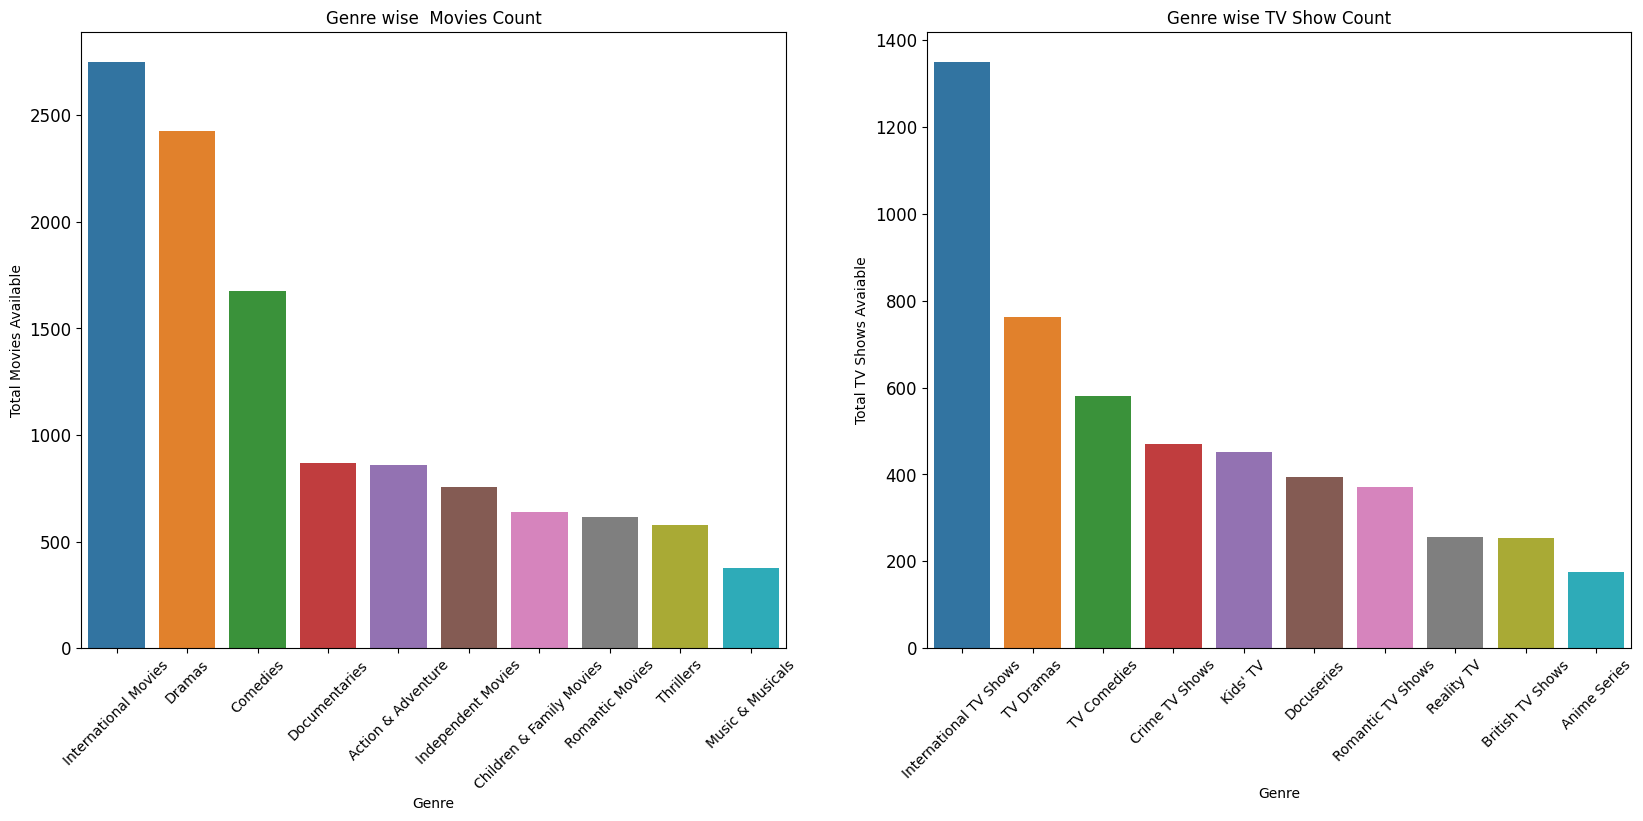

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = moviegenre.iloc[:10], x="listed_in",y="title")
plt.title("Genre wise  Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Genre",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowgenre.iloc[:10], x="listed_in",y="title")
plt.title("Genre wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Genre",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* Internation Movies/TV shows are more popular Content in Netflix
* Next popular content comes in  Genres like Drama and then Comedy

---



---



# **Analysis of Duration**

In [ ]:
moviedata.groupby("duration")["title"].count()

duration
0      3
3      1
5      1
8      1
9      1
      ..
233    1
237    1
253    1
273    1
312    1
Name: title, Length: 206, dtype: int64

In [ ]:
tvshowdata.groupby("duration")["title"].count()

duration
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
11       2
12       2
13       3
15       2
17       1
Name: title, dtype: int64

In [ ]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   int64         
 9   duration      6131 non-null   int64         
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 622.7+ KB


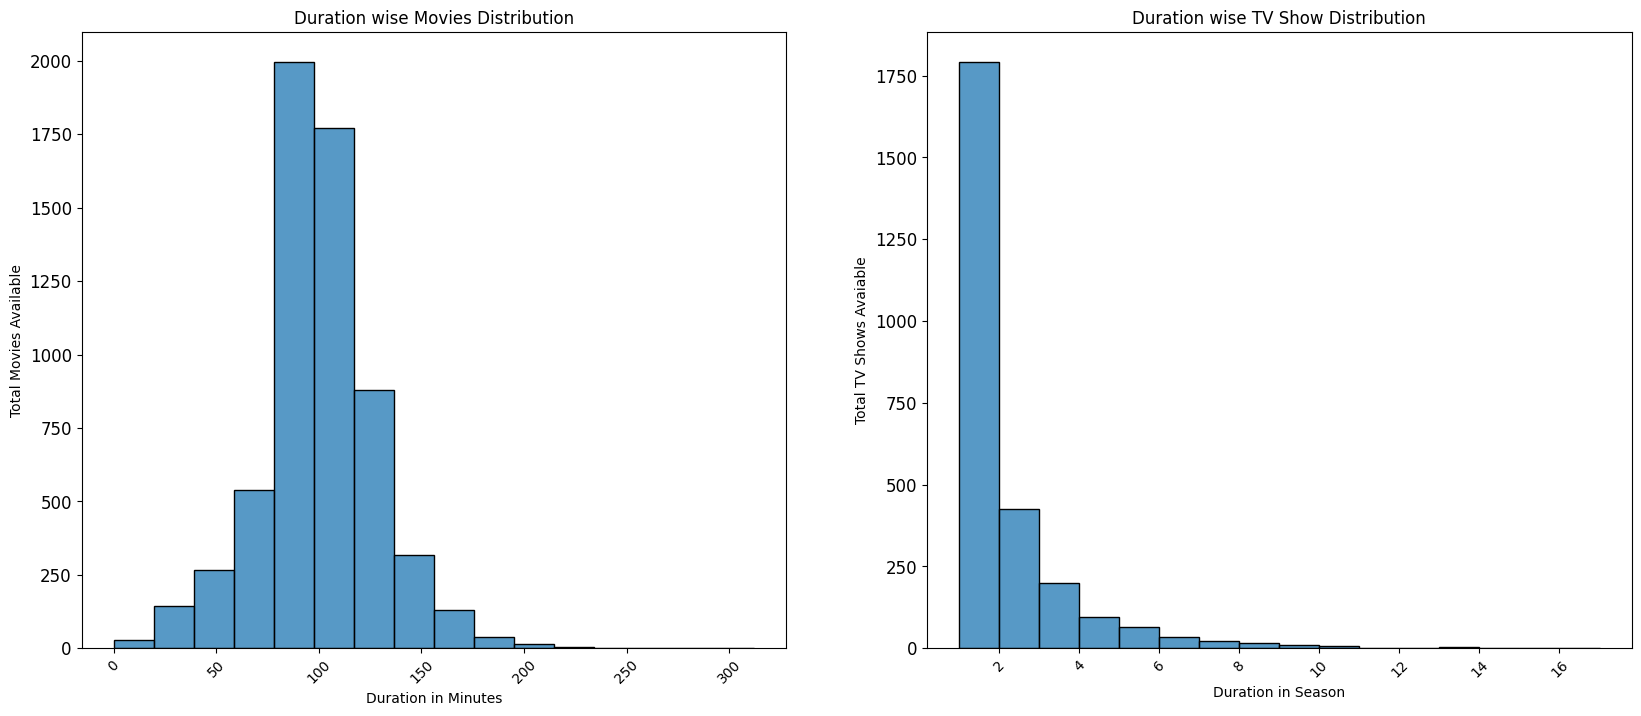

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.histplot(moviedata["duration"],bins = 16)
plt.title("Duration wise Movies Distribution",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Duration in Minutes",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.histplot(tvshowdata["duration"],bins=16)
plt.title("Duration wise TV Show Distribution",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Duration in Season",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* 60% of the Movie have Duration range between 80-120 Mins
* 65% of the TV shows have 1 Season

# **Analysis of Date_added**

In [ ]:
moviedata.groupby("year_added")["title"].count()

year_added
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     253
2017.0     839
2018.0    1237
2019.0    1424
2020.0    1284
2021.0     993
Name: title, dtype: int64

In [ ]:
tvshowdata.groupby("year_added")["title"].count()

year_added
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
Name: title, dtype: int64

# **Better Time to Add Content after Releasing**

* Considering Shows with Release Year from 1990 to latest

In [ ]:
datatimetoadd = data2[(data2["release_year"] >=1990)]

In [ ]:
datatimetoadd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8556 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8556 non-null   object        
 1   type          8556 non-null   object        
 2   title         8556 non-null   object        
 3   director      5940 non-null   object        
 4   cast          7745 non-null   object        
 5   country       7735 non-null   object        
 6   date_added    8546 non-null   datetime64[ns]
 7   release_year  8556 non-null   int64         
 8   rating        8556 non-null   int64         
 9   duration      8556 non-null   int64         
 10  listed_in     8556 non-null   object        
 11  description   8556 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 869.0+ KB


In [ ]:
datatimetoadd["timeDiff"] = datatimetoadd["date_added"].dt.year - datatimetoadd["release_year"]

<ipython-input-109-94eeff51cd50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimetoadd["timeDiff"] = datatimetoadd["date_added"].dt.year - datatimetoadd["release_year"]


In [ ]:
datatimetoadd["timeDiff"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
8802    12.0
8803     1.0
8804    10.0
8805    14.0
8806     4.0
Name: timeDiff, Length: 8556, dtype: float64

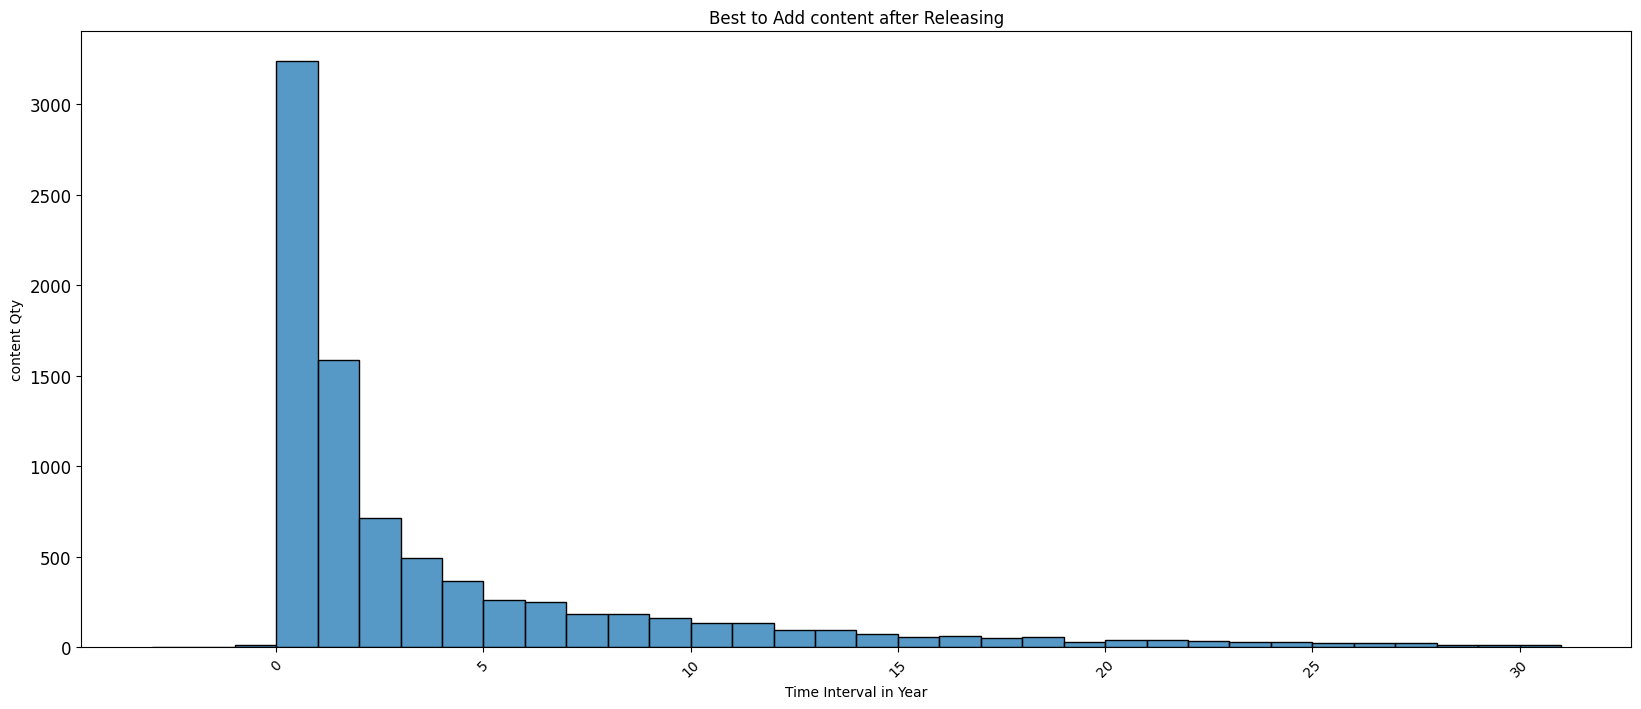

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(datatimetoadd["timeDiff"],bins=34)
plt.title("Best to Add content after Releasing",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Time Interval in Year",fontsize = 10)
plt.ylabel("content Qty",fontsize = 10)
plt.show()

* Best time to add Content after Releasing is within 1 Year

# **Genre & Rating Relation Analysis**

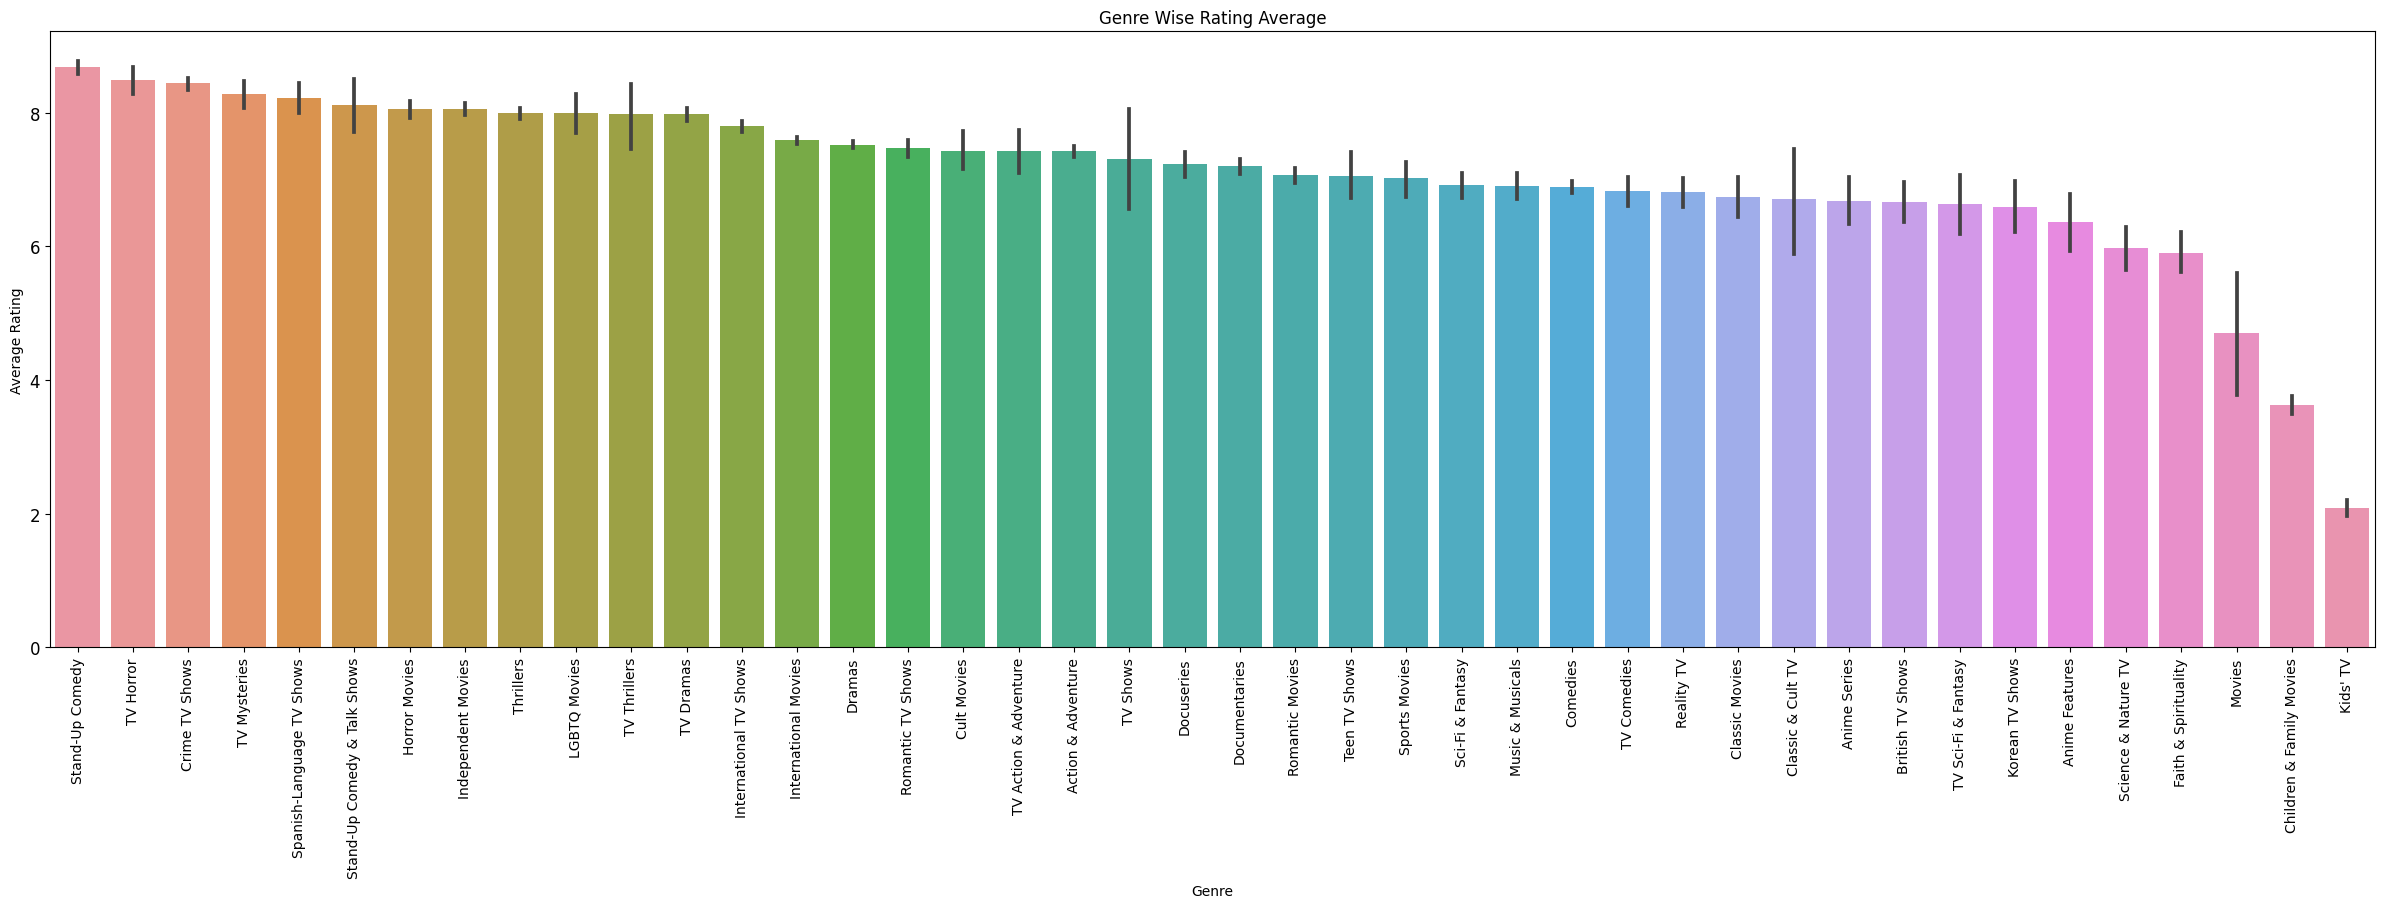

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data = data2.explode("listed_in"), x= "listed_in", y= "rating",estimator = np.mean,order = data2.explode("listed_in").groupby("listed_in")["rating"].mean().sort_values(ascending = False).index)
plt.title("Genre Wise Rating Average",fontsize = 12)
plt.xticks(rotation=90,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Genre",fontsize = 10)
plt.ylabel("Average Rating",fontsize = 10)
plt.show()


* Genre & Ratings seems quire Acceptable
* Genres like Crime & Horror are having mean rating of 9
* Genres like Kids TV is having mean rating of 3

In [ ]:
data2.corr()

<ipython-input-114-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


release_year    rating  duration
release_year      1.000000  0.071974 -0.249087
rating            0.071974  1.000000  0.141633
duration         -0.249087  0.141633  1.000000

# **Content Release & Added year relation**

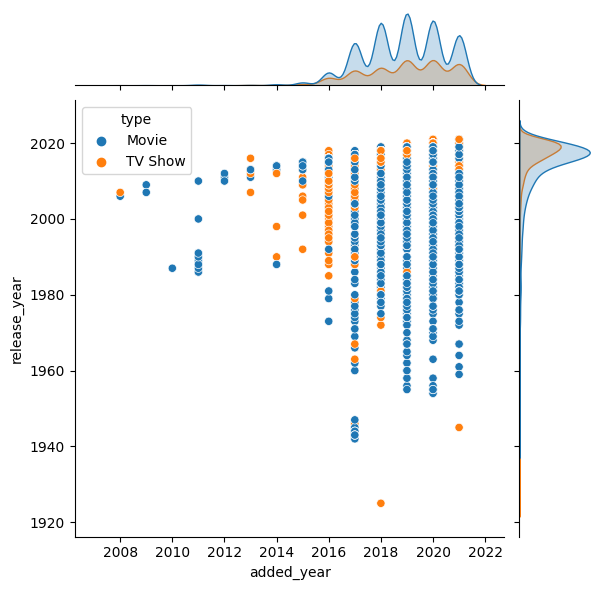

In [ ]:
sns.jointplot(data=data2,x="added_year",y="release_year",hue="type")

* Rapid Content Addition in Netflix  has started from 2016
* Netflix has Major content which was release between 2000 to 2021
* Oldest Content Netflix has is of year 1925 and latest is of year 2021

# **Highest Content Avaiable Country vs Rating Distribution**

In [ ]:
data3 = data2.explode("country")
data3 = data3[(data3["country"]== "United States") | (data3["country"]== "India") | (data3["country"]== "United Kingdom") | (data3["country"]== "Canada")| (data3["country"]== "France")]

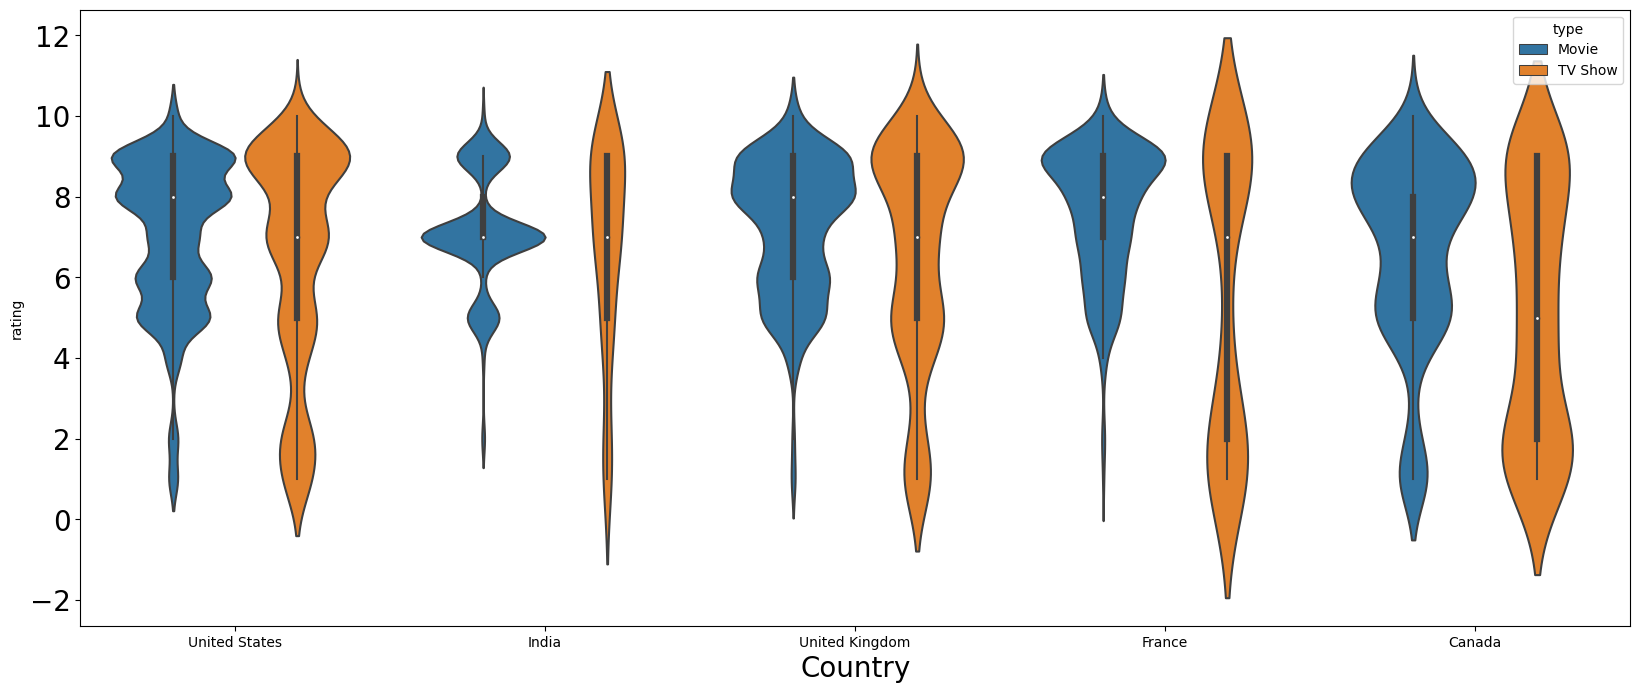

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(data=data3,x="country", y="rating",hue = "type")
plt.yticks(fontsize = 20)
plt.xlabel("Country",fontsize = 20)
plt.show()

# **Business Insights**

* Netflix has more Movies[6131] than TV Shows[2676]
* Netflix has coverage in 127 Countries however Movies content is avaiable in 122 countries & TV show Content only in 66 Countries [ USA has overall highest content avaiable]
* Netflix has content created by 4994 Directors, however 4000 of them have only their 1st content avaiable in Netflix
* Netflix has content acted by 36439 Actors, however 3000 of them have only their 1st content avaiable in Netflix
* Netflix started content addition from 2008 and adding content since then every year, also started to drastically increase from 2016 & Peaked in year 2019 with 2016 Nos content added in single year
* 88% Shows Avaible are Either Matured Content or Where Parental Guidance is Needed,Content avaiable for children is very less
* Best time to Launch Content is on Friday of a week & 1st week of a Month & December/January of a Year
* Netflix has Movies in 20 Genres & 22 Genres in TV Shows
* 60% of the Movie have Duration range between 80-120 Mins &
65% of the TV shows have only 1 Season
* Best time to add Content in Netflix is with in One year of Releasing
* Oldest Content Netflix has is of year 1925 and latest is of year 2021






# **Recommendations**

* Netflix should Expand its Coverage fro 127 Countries to all 195 countries in world
* Particularily, Netflix should expand its TV show coverage to all 122 Countries Where Movie Content is presently avaiable
* Netflix should increase Children Friendly content
* Content addition has drastically grown from 2016 & kept growing Continuously, Netflix should prepare its infrastructure & Resources to meet growing Market

